***
***


<br><h1>Unsupervised Learning Analysis  |       Apprentice Chef, Inc. - Business Case</h1>
<h3>MSc in Business Analytics           |       Machine Learning - Python</h3>
<br>Jorge Hernández Jiménez - Marketing Analyst<br>
Hult International Business School<br>

<a href="https://github.com/jhj95">GitHub</a> <br>
<a href="https://www.linkedin.com/in/jorge-hernandez-jimenez/">LinkedIn</a><br><br><br>

***
***

This is my first project using Supervised Learning in Python (Machine Learning) (03/07/2020). In it I build some regression models using different linear and nearest neighbors models from <a href="https://scikit-learn.org/stable/">Scikit-Learn</a> Library in Python. (Models used: <a href="https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">OLS</a>, <a href="https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification">Ridge</a>, <a href="https://scikit-learn.org/stable/modules/linear_model.html#lasso">Lasso</a>, <a href="https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression">ARD</a>, <a href="https://scikit-learn.org/stable/modules/neighbors.html">KNN</a> (non-standarized and standardized))

It is an analysis on a business case created by my Professor <a href="https://www.linkedin.com/in/kusterer/">Chase B. Kusterer</a> in the Machine Learning course from the MSc in Business Analytics at Hult International Business School in San Francisco. The case consists on a digital food enterprise, Apprentice Chef, Inc.  that: “offer a wide selection of daily-prepared gourmet meals delivered directly to your door.”.

So, the analysis consists on building a regression model that predicts the revenue that each customer is going to pay in his/her first year using this platform.

<br><br>


<h2>Index</h2>

<h3> Dataset Exploration </h3>

    * Importing libraries
    * Setting Pandas print options
    * Loading dataset
    * Exploring dataset
    
    
<h3>Feature Engineering</h3>

    * Developing new variables
    * Outlier Analysis (plot and thresholds)
    * Trend-Based Features between the dependent variable (REVENUE) and independent variables (plot and thresholds)
    * Dummies from categorical variables (EMAIL_DOMAIN and MEAN_MEDIAN RATING)
    
    
<h3>Model Development</h3>
    
    * Plotting correlations
    * Developing candidate statmodels (chechking R-squared, p-values and correlations)
    * Model tournament
        * OLS
        * Ridge
        * Lasso
        * ARD
        * KNN (non-standarized and standardized)
        
        
<h3>Conclusion</h3><br><br>
    
    
*
Documentation: <a href="https://scikit-learn.org/stable/">Scikit-Learn</a> ( <a href="https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">OLS</a> , <a href="https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification">Ridge</a> , <a href="https://scikit-learn.org/stable/modules/linear_model.html#lasso">Lasso</a> , <a href="https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression">ARD</a> , <a href="https://scikit-learn.org/stable/modules/neighbors.html">KNN</a> )

<br>

<h2> Dataset Exploration </h2>
<h3> Importing Libraries: </h3>
    
Importing all the libraries I'm going to use for this analysis. (<a href="https://pandas.pydata.org/docs/">Pandas</a>, <a href="https://numpy.org/doc/">Numpy</a>, <a href="https://matplotlib.org/3.2.1/contents.html">Matplotlib</a>, <a href="https://seaborn.pydata.org/">Seaborn</a>, <a href="https://www.statsmodels.org/stable/index.html">Statsmodels</a>, <a href="https://scikit-learn.org/stable/">Scikit-Learn</a>)
 

In [1]:
# importing libraries
import numpy                    as   np      # data science essentials
import pandas                   as   pd      # data science essentials
import matplotlib.pyplot        as   plt     # essential graphical output
import seaborn                  as   sns     # enhanced graphical output
import statsmodels.formula.api  as   smf     # regression modeling
import sklearn.linear_model                  # (scikit-learn)linear models (LinearRegression, Ridge, Lasso, ARD)

from sklearn.model_selection    import train_test_split
from sklearn.neighbors          import KNeighborsRegressor     # KNN for Regression
from sklearn.preprocessing      import StandardScaler          # standard scaler


<h3> Setting Pandas' Print Options: </h3>


In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


<h3> Loading Dataset: </h3>

Loading excel file: 'Apprentice_Chef_Dataset.xlsx', provided with the business case. You can download the file from here: <a href="https://github.com/jhj95/Unsupervised-Learning-Analysis-Apprentice-Chef-Inc./blob/master/Apprentice_Chef_Dataset.xlsx">Apprentice Dataset</a>, and the dictionary with explanation of each variable from here: <a href="https://github.com/jhj95/Unsupervised-Learning-Analysis-Apprentice-Chef-Inc./blob/master/Apprentice_Chef_Data_Dictionary.xlsx">Apprentice Dictionary.</a>



In [3]:
# specifying file name
file = 'Apprentice_Chef_Dataset.xlsx'

# reading the file into Python and naming it apprentice
apprentice = pd.read_excel(file)


<h3> Exploring Dataset: </h3>

Checking the columns of the dataset

In [4]:
# column names
print(apprentice.columns)

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'FOLLOWED_RECOMMENDATIONS_PCT', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'], dtype='object')


<br>
Checking the first 5 rows of the dataset to get gist of the data

In [5]:
apprentice.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0          6              2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0          6              1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1          6              2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1          6              1           11                 5                4               0                    0                            90              125.0                   3                        0                   3                    13                    0
4   1923.0                   1                 Aegon V Targaryen         aegon.v.targaryen@goldmansacs.com      Aegon  V Targaryen                   65                   3                            6                          9                   106.00              1                          1                         1                       0          6              2           12                 0                4               1                    0                            90              135.3                   3                        1                   3                    13                  253

<br>
Checking the descriptive descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding missing values ('NaN') values.

In [6]:
apprentice.describe().round(2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00                       1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11                         35.41             150.56                4.44                     0.60                2.79                 13.51               106.43
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32                         26.58              49.45                1.55                     0.64                0.76                  2.33               181.01
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00                    0.00       4.00           0.00         0.00              0.00             0.00            0.00                 0.00                          0.00              33.40                0.00                     0.00                1.00                  5.00                 0.00
25%    1350.00                0.00                39.00                 3.0                         5.00                       3.00                    72.00           1.00                       0.00                      0.00                    0.00       5.00           1.00         1.00              0.00             1.00            0.00                 0.00                         10.00             114.40                3.00                     0.00                2.00                 12.00                 0.00
50%    1740.00                1.00                60.00                 5.0                         7.00                       5.00                    94.16           1.00                       1.00                      0.00                    1.00       6.00           1.00         7.00              0.00             2.00            0.00                 0.00                         30.00             145.60                4.00                     1.00                3.00                 13.00                 0.00
75%    2670.00                1.00                95.00                 7.0                         8.00                       8.00                   117.29           1.00                       2.00                      0.00                    1.00       6.00           2.00        13.00              3.00             4.00            1.00                 0.00                         60.0

<br>
<h2> Feature Engineering </h2>
<h3> Developing New Variables </h3>

Creating a column to create a categorical variable with the email domains.<br>
<br>
**Step 1:** Separating domains from prefix with a for loop, and place them in a new list (placeholder_lst) and converting it in a dataframe (email_df).

In [7]:
#We are going to create a column for email domain
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in apprentice.iterrows():
    
    # splitting email domain at '@'
    split_email = apprentice.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df


<br>

**Step 2:** Naming the two columns of the new dataframe ('NAME', 'EMAIL_DOMAIN') and concatanating it with apprentice dataframe. Finally, we check the different types of domains in our dataset.

In [8]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
# apprentice = pd.read_excel('Apprentice_Chef_Dataset.xlsx')

# renaming column to concatenate
email_df.columns = ['NAME' , 'EMAIL_DOMAIN']


# concatenating email_domain with friends DataFrame
apprentice = pd.concat([apprentice, email_df['EMAIL_DOMAIN']],
                   axis = 1)


# printing value counts of personal_email_domain
apprentice.loc[: ,'EMAIL_DOMAIN'].value_counts()



gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
mcdonalds.com        28
cocacola.com         28
jnj.com              28
merck.com            28
nike.com             27
apple.com            27
ibm.com              26
ge.org               26
dupont.com           26
chevron.com          25
microsoft.com        25
exxon.com            24
unitedhealth.com     24
travelers.com        24
boeing.com           23
mmm.com              22
verizon.com          22
pg.com               22
caterpillar.com      22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
goldmansacs.com      18
cisco.com            18
unitedtech.com       18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAIN, dtype: int64

<br>

**Step 3:** Creating three groups to separate the emails for categories. The division of the emails in each group is set in the business case: Apprentice Chef, Inc.

In [9]:
# STEP 3

# We can create new groups : professional, personal and junk
# These groups are extracted from the case: 'Apprentice Chef'

# email domain types
PROFESSIONAL_EMAIL = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com',
                      '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com','@dupont.com',
                      '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com',
                      '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                      '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                      '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com',
                      '@walmart.com']


PERSONAL_EMAIL = ['@gmail.com', '@protonmail.com', '@yahoo.com']


JUNK_EMAIL = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']



# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in apprentice['EMAIL_DOMAIN']:
        if '@' + domain in PROFESSIONAL_EMAIL:
            placeholder_lst.append('professional')
            
        elif '@' + domain in PERSONAL_EMAIL:
            placeholder_lst.append('personal')
            
        elif '@' + domain in JUNK_EMAIL:
            placeholder_lst.append('junk')  
            
        else:
            placeholder_lst.append('Error')


# concatenating with original DataFrame
apprentice['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
apprentice['DOMAIN_GROUP'].value_counts()


personal        861
professional    696
junk            389
Name: DOMAIN_GROUP, dtype: int64

<br> 

*REVENUE* is going to be the dependent variable of our model. Because what we want to predict is: "the revenue that each customer is going to pay in his/her first year using this platform."<br>

However, because *REVENUE* has really high values, we are going to use instead the logarithm of *REVENUE* with the variable: **LN_REVENUE.** This does not affect at all our predictive model and enhance its results, THAT'S AWESOME, RIGHT?

In [10]:
# Creating a variable with the log of Revenue
LN_REVENUE = np.log(apprentice['REVENUE'])

apprentice['LN_REVENUE'] = pd.Series(LN_REVENUE)


#apprentice['REVENUE'].replace(to_replace = LN_REVENUE,
#                              inplace    = True)


<br>

**Users need to register a phone number to finish registration,** though those who didn´t register a phone number should be removed? No, but we will keep an eye on them. That's why we will put them inside a separate variable for if we need it later on the analysis.

In [11]:
no_mobile = apprentice[apprentice['MOBILE_NUMBER'] == 0]

apprentice['MOBILE_NUMBER'].value_counts()


1    1708
0     238
Name: MOBILE_NUMBER, dtype: int64

<br>

Checking how many people did not provide their phone number and provide their junk email. **We can conclude these users have no interest on becoming a usual customer.** In conclusion, they are not going to be profitable customers.

In [12]:
# These guys provide a junk email and didn´t provide phone number, don´t seem 
# to have any interest on becoming a usual customer

apprentice['BAD_CUST'] = 0


condition_bad = apprentice.loc[0:, 'BAD_CUST'][apprentice['MOBILE_NUMBER'] == 0]\
                [apprentice['DOMAIN_GROUP'] == 'junk']


apprentice['BAD_CUST'].replace(to_replace = condition_bad,
                               value      = 1,
                               inplace    = True)


apprentice['BAD_CUST'].value_counts()


0    1902
1      44
Name: BAD_CUST, dtype: int64

<br>

Same way we will put apart those that could be consider **GOOD CUSTOMERS** (professional emails and  phone number) Why professional emails and not personal emails? Usually, people check more often their professional email, because they open it every day at work, someone who provide a professional email is showing a bigger interest becuase they want to be update every day.

In [13]:
apprentice['GOOD_CUST'] = 0


condition_good = apprentice.loc[0:, 'GOOD_CUST'][apprentice['MOBILE_NUMBER'] == 1]\
                 [apprentice['DOMAIN_GROUP'] == 'professional']


apprentice['GOOD_CUST'].replace(to_replace = condition_good,
                                value      = 1,
                                inplace    = True)


apprentice['GOOD_CUST'].value_counts()



0    1339
1     607
Name: GOOD_CUST, dtype: int64

<br>

Creating a column based on a rate for how many unique meals has been purchased per each normal meal ordered.

In [14]:
#UNIQUE_PER_TOTALS
apprentice['UNIQUE_PER_TOTALS'] = (apprentice['UNIQUE_MEALS_PURCH'] / apprentice['TOTAL_MEALS_ORDERED']).round(2)


<br>

Creating a column with the total cancellations by doing the sum between *CANCELLATIONS_BEFORE_NOON* and *CANCELLATIONS_AFTER_NOON*

In [15]:
# TOTAL CANCELLATIONS
apprentice['TOTAL_CANCELATIONS'] = apprentice['CANCELLATIONS_BEFORE_NOON']\
                                   + apprentice['CANCELLATIONS_AFTER_NOON']


<br>

Creating a column with the orders that has been trully orders because they were not lately cancelled.

In [16]:
# SUCCESSFUL_ORDERS
apprentice['SUCCESSFUL_ORDERS'] = apprentice['TOTAL_MEALS_ORDERED'] - apprentice['TOTAL_CANCELATIONS']


<br>

Creating a column based on the late deliveries per total orders, this can really influence negatively the perception of the brand.

In [17]:
# LATE_PER_TOTAL
apprentice['LATE_PER_TOTAL'] = apprentice.LATE_DELIVERIES / apprentice.TOTAL_MEALS_ORDERED


<br>

Creating a column with the early deliveries per total orders, this can really influence positively the perception of the brand.

In [18]:
# EARLY_PER_TOTAL
apprentice['EARLY_PER_TOTAL'] = apprentice.EARLY_DELIVERIES / apprentice.TOTAL_MEALS_ORDERED


<br>

Creating a column to check the right use of the platform by calculating the number of product categories a user has search based on the total number of logins.

In [19]:
# PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS
apprentice['PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS'] = apprentice.PRODUCT_CATEGORIES_VIEWED \
                                            / (apprentice.PC_LOGINS + apprentice.MOBILE_LOGINS)


<br>

Creating a column with the total number of logins (mobile and pc).

In [20]:
# TOTAL_LOGINS
apprentice['TOTAL_LOGINS'] = apprentice.MOBILE_LOGINS + apprentice.PC_LOGINS

<br>

Creating a column to check succesful purchases based on total logins.

In [21]:
# TOTAL_LOGINS_PER_TOTAL_MEALS
apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS'] = apprentice.TOTAL_LOGINS / apprentice.TOTAL_MEALS_ORDERED


<br>

Creating a column that calculates the number of times a user has contacted customer service per total orders.

In [22]:
# CONTACTS_PER_TOTALS
apprentice['CONTACTS_PER_TOTALS'] = apprentice.CONTACTS_W_CUSTOMER_SERVICE /  apprentice.TOTAL_MEALS_ORDERED


<br>

Taking a look to the new dataset with the new variables: 

In [23]:
apprentice.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED     EMAIL_DOMAIN  DOMAIN_GROUP  LN_REVENUE  BAD_CUST  GOOD_CUST  UNIQUE_PER_TOTALS  TOTAL_CANCELATIONS  SUCCESSFUL_ORDERS  LATE_PER_TOTAL  EARLY_PER_TOTAL  PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS  TOTAL_LOGINS  TOTAL_LOGINS_PER_TOTAL_MEALS  CONTACTS_PER_TOTALS
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0          6              2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0     passport.com          junk    7.539027         0          0               0.03                   3                115        0.016949         0.000000                                    0.625000             8                      0.067797             0.059322
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0          6              1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90          jnj.com  professional    7.309881         0          1               0.07                   1                 43        0.090909         0.000000                                    0.428571             7                      0.159091             0.136364
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1          6              2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0        gmail.com      personal    7.852633         0          0               0.03                   5                 33        0.000000         0.000000                                    0.375000             8                      0.210526             0.131579
3   1647.0                   1  Aegon Targaryen (son of Rhaegar)  aegon.targaryen.(son.of.rhaegar)@ibm.com      Aegon   Targaryen                    76                   3                            8                         10                    45.51              0                          3                         0                       1          6              1           11                 5                4               0                    0                            90          

<br>

And also to the descriptive statistics...

In [24]:
apprentice.describe().round(2)

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  LN_REVENUE  BAD_CUST  GOOD_CUST  UNIQUE_PER_TOTALS  TOTAL_CANCELATIONS  SUCCESSFUL_ORDERS  LATE_PER_TOTAL  EARLY_PER_TOTAL  PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS  TOTAL_LOGINS  TOTAL_LOGINS_PER_TOTAL_MEALS  CONTACTS_PER_TOTALS
count  1946.00             1946.00              1946.00              1946.0                      1946.00                    1946.00                  1946.00        1946.00                    1946.00                   1946.00                 1946.00    1946.00        1946.00      1946.00           1946.00          1946.00         1946.00              1946.00                       1946.00            1946.00             1946.00                  1946.00             1946.00               1946.00              1946.00     1946.00   1946.00    1946.00            1946.00             1946.00            1946.00         1946.00          1946.00                                     1946.00       1946.00                       1946.00              1946.00
mean   2107.29                0.68                74.63                 4.9                         6.98                       5.38                    99.60           0.88                       1.40                      0.17                    0.71       5.52           1.48        11.33              1.49             2.97            0.36                 0.11                         35.41             150.56                4.44                     0.60                2.79                 13.51               106.43        7.53      0.02       0.31               0.11                1.57              73.06            0.07             0.03                                        0.78          6.99                          0.16                 0.18
std    1138.29                0.47                55.31                 2.5                         2.28                       3.04                    62.34           0.33                       1.55                      0.43                    0.45       0.58           0.53        13.57              2.32             2.74            0.48                 0.32                         26.58              49.45                1.55                     0.64                0.76                  2.33               181.01        0.49      0.15       0.46               0.12                1.61              55.32            0.10             0.07                                        0.45          0.79                          0.14                 0.24
min     131.00                0.00                11.00                 1.0                         1.00                       1.00                    10.33           0.00                       0.00                      0.00                    0.00       4.00           0.00         0.00              0.00             0.00            0.00                 0.00                          0.00              33.40                0.00                     0.00                1.00                  5.00                 0.00        4.88      0.00       0.00               0.01                0.00               6.00            0.00             0.00                                        0.12          5.00                          0.01                 0.01
25%    1350.00                0.00                39.00                 3.0                         5.00                       3.00                    72.00           1.00                       0.00                      0.00                    0.00       5.

<br>

Checking the variable types:

In [25]:
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 43 columns):
REVENUE                                       1946 non-null float64
CROSS_SELL_SUCCESS                            1946 non-null int64
NAME                                          1946 non-null object
EMAIL                                         1946 non-null object
FIRST_NAME                                    1946 non-null object
FAMILY_NAME                                   1899 non-null object
TOTAL_MEALS_ORDERED                           1946 non-null int64
UNIQUE_MEALS_PURCH                            1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE                   1946 non-null int64
PRODUCT_CATEGORIES_VIEWED                     1946 non-null int64
AVG_TIME_PER_SITE_VISIT                       1946 non-null float64
MOBILE_NUMBER                                 1946 non-null int64
CANCELLATIONS_BEFORE_NOON                     1946 non-null int64
CANCELLATIONS_AFTER_NOON   

<br>

Checking the number of missing values per column:

In [26]:
apprentice.isnull().sum()

REVENUE                                        0
CROSS_SELL_SUCCESS                             0
NAME                                           0
EMAIL                                          0
FIRST_NAME                                     0
FAMILY_NAME                                   47
TOTAL_MEALS_ORDERED                            0
UNIQUE_MEALS_PURCH                             0
CONTACTS_W_CUSTOMER_SERVICE                    0
PRODUCT_CATEGORIES_VIEWED                      0
AVG_TIME_PER_SITE_VISIT                        0
MOBILE_NUMBER                                  0
CANCELLATIONS_BEFORE_NOON                      0
CANCELLATIONS_AFTER_NOON                       0
TASTES_AND_PREFERENCES                         0
PC_LOGINS                                      0
MOBILE_LOGINS                                  0
WEEKLY_PLAN                                    0
EARLY_DELIVERIES                               0
LATE_DELIVERIES                                0
PACKAGE_LOCKER      

<br>

There are only missing values in the column family name which I am not going to use for my analysi. So I won´t  do any missing value imputation.

<br>

Let's check now the quantiles of the dataset:

In [27]:
apprentice.loc[:, :].quantile([0.20,
                               0.40,
                               0.60,
                               0.80,
                               1.00])

REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  LN_REVENUE  BAD_CUST  GOOD_CUST  UNIQUE_PER_TOTALS  TOTAL_CANCELATIONS  SUCCESSFUL_ORDERS  LATE_PER_TOTAL  EARLY_PER_TOTAL  PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS  TOTAL_LOGINS  TOTAL_LOGINS_PER_TOTAL_MEALS  CONTACTS_PER_TOTALS
0.2  1285.00                 0.0                 35.0                 3.0                          5.0                        2.0                    61.58            1.0                        0.0                       0.0                     0.0        5.0            1.0          0.0               0.0              1.0             0.0                  0.0                          10.0              108.6                 3.0                      0.0                 2.0                  12.0                  0.0    7.158514       0.0        0.0               0.03                 0.0               34.0        0.008547         0.000000                                    0.333333           6.0                      0.064220             0.058824
0.4  1558.00                 1.0                 51.0                 4.0                          6.0                        4.0                    86.51            1.0                        1.0                       0.0                     1.0        5.0            1.0          5.0               0.0              2.0             0.0                  0.0                          20.0              134.4                 4.0                      0.0                 3.0                  13.0                  0.0    7.351158       0.0        0.0               0.05                 1.0               49.0        0.025547         0.000000                                    0.571429           7.0                      0.098592             0.086957
0.6  1910.00                 1.0                 71.0                 6.0                          7.0                        6.0                   102.62            1.0                        1.0                       0.0                     1.0        6.0            2.0         10.0               1.0              3.0             0.0                  0.0                          40.0              156.7                 5.0                      1.0                 3.0                  14.0                 28.0    7.554859       0.0        0.0               0.09                 2.0               69.0        0.051282         0.003311                                    0.875000           7.0                      0.137255             0.119048
0.8  2895.00                 1.0                106.0                 7.0                          9.0                        9.0                   123.80            1.0                        2.0                       0.0                     1.0        6.0            2.0         16.0               3.0              5.0             1.0                  0.0                          70.0              183.8                 6.0                      1.0                 3.0                  16.0                210.0    7.970740       0.0        1.0               0.16                 3.0              105.0        0.097561         0.052632                                    1.250000           8.0                      0.200000             0.169811
1.0  8793.75                 1.0                493.0                19.0                         18.0                       10.0                  1645.60            1.0                       13.0                       3.0                     1.0        7.0        

<br>

Writing a code to dynamically print the value counts for each variable that has been assumed categorical.

In [28]:

print(f"""
EMAIL_DOMAIN
------------
{apprentice['EMAIL_DOMAIN'].value_counts().sort_index()}


MEDIAN_MEAL_RATING
------------------
{apprentice['MEDIAN_MEAL_RATING'].value_counts().sort_index()}


""")


EMAIL_DOMAIN
------------
amex.com             30
aol.com              69
apple.com            27
boeing.com           23
caterpillar.com      22
chevron.com          25
cisco.com            18
cocacola.com         28
disney.com           21
dupont.com           26
exxon.com            24
ge.org               26
gmail.com           303
goldmansacs.com      18
homedepot.com        17
hotmail.com          63
ibm.com              26
intel.com            17
jnj.com              28
jpmorgan.com         19
live.com             62
mcdonalds.com        28
me.com               59
merck.com            28
microsoft.com        25
mmm.com              22
msn.com              72
nike.com             27
passport.com         64
pfizer.com           20
pg.com               22
protonmail.com      284
travelers.com        24
unitedhealth.com     24
unitedtech.com       18
verizon.com          22
visa.com             20
walmart.com          21
yahoo.com           274
Name: EMAIL_DOMAIN, dtype: int64


ME

<h3> Outlier Analysis </h3>


Let´s plot using histograms the distribution of the variables in the Apprentice dataset. I'm doing it by using a for loop that plot every 4 variable from the *histogram* list.

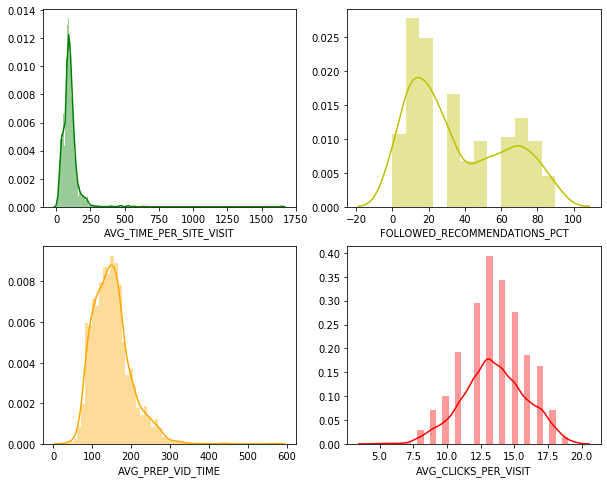

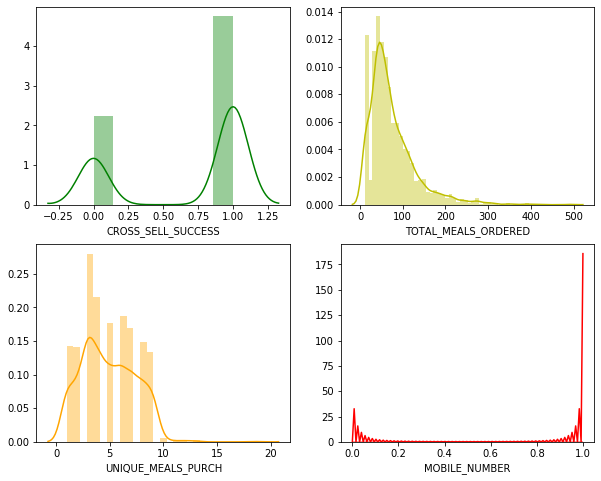

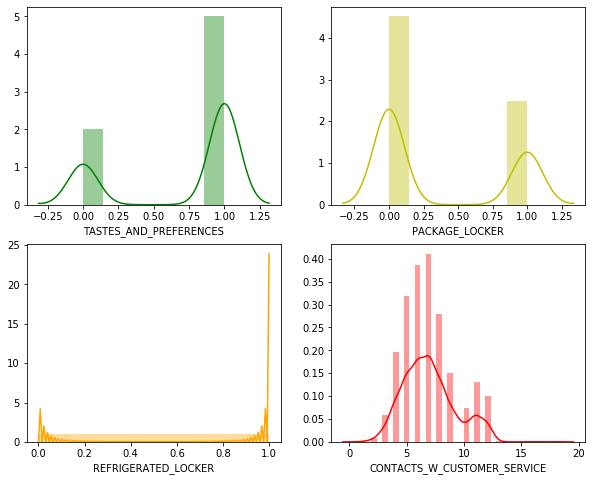

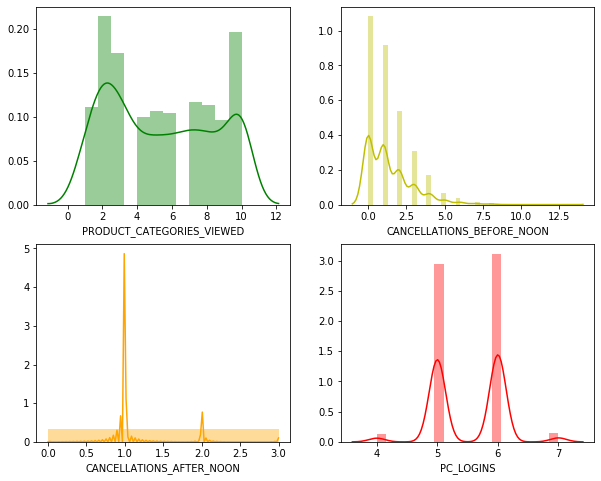

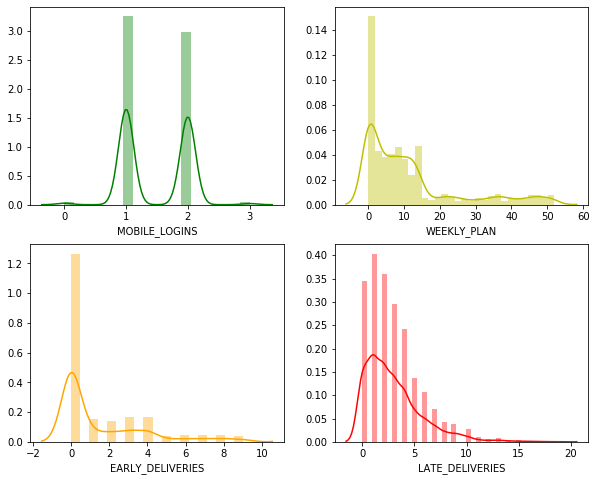

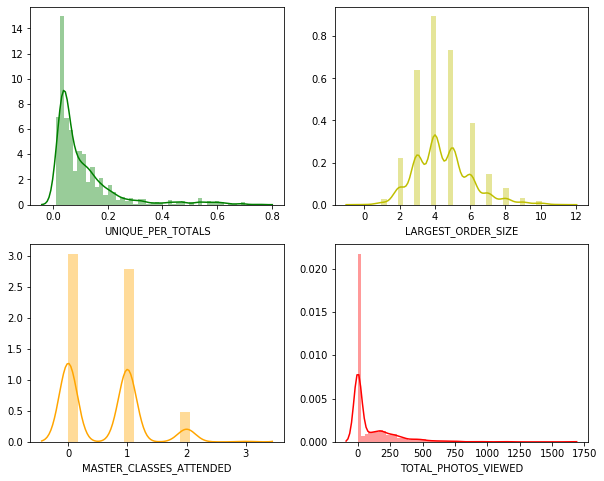

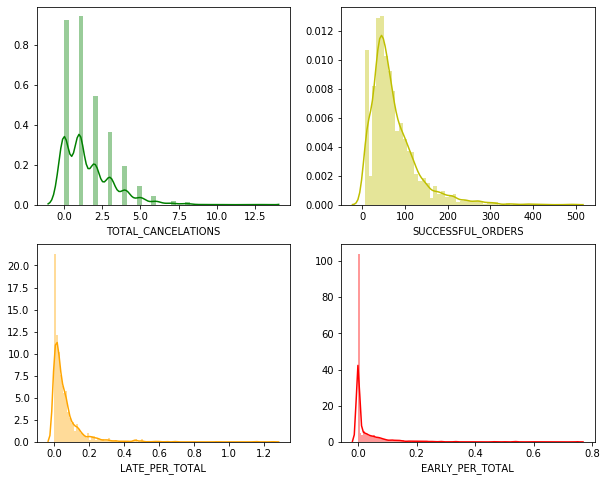

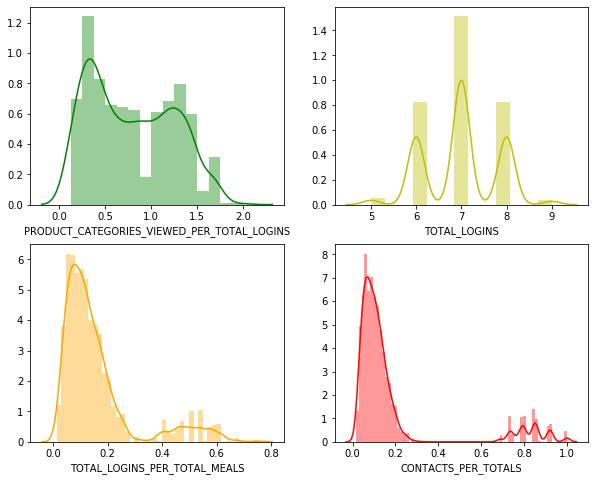

In [30]:
#Outlier Analysis - Histograms

########################
# Visual EDA (Histograms)
########################


histograms= [['AVG_TIME_PER_SITE_VISIT', 'FOLLOWED_RECOMMENDATIONS_PCT',
              'AVG_PREP_VID_TIME', 'AVG_CLICKS_PER_VISIT'],
             ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED',
              'UNIQUE_MEALS_PURCH', 'MOBILE_NUMBER'],
             ['TASTES_AND_PREFERENCES', 'PACKAGE_LOCKER', 
              'REFRIGERATED_LOCKER', 'CONTACTS_W_CUSTOMER_SERVICE'],
             ['PRODUCT_CATEGORIES_VIEWED', 'CANCELLATIONS_BEFORE_NOON',
              'CANCELLATIONS_AFTER_NOON', 'PC_LOGINS'],
             ['MOBILE_LOGINS', 'WEEKLY_PLAN',
              'EARLY_DELIVERIES', 'LATE_DELIVERIES'],
             ['UNIQUE_PER_TOTALS', 'LARGEST_ORDER_SIZE',
              'MASTER_CLASSES_ATTENDED', 'TOTAL_PHOTOS_VIEWED'],
             ['TOTAL_CANCELATIONS', 'SUCCESSFUL_ORDERS',
              'LATE_PER_TOTAL', 'EARLY_PER_TOTAL'],
             ['PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS', 'TOTAL_LOGINS',
              'TOTAL_LOGINS_PER_TOTAL_MEALS','CONTACTS_PER_TOTALS']]

# Creating a variable to count the number of times the loop run
loop = 0

for a,b,c,d in histograms:

    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(apprentice[a],
                 bins  = 'fd',
                 color = 'g')
    plt.xlabel(a)

    ########################

    ########################

    plt.subplot(2, 2, 2)
    sns.distplot(apprentice[b],
                 bins  = 'fd',
                 color = 'y')
    plt.xlabel(b)

    ########################

    ########################

    plt.subplot(2, 2, 3)
    sns.distplot(apprentice[c],
                 bins  = 'fd',
                 color = 'orange')
    plt.xlabel(c)

    ########################

    ########################

    plt.subplot(2, 2, 4)
    sns.distplot(apprentice[d],
                 bins  = 'fd',
                 color = 'r')
    plt.xlabel(d)
    
    
    # Adding 1 to the loop variable so it save every time the loop runs different variables
    loop +=1
        
    plt.savefig(f'Apprentice Histograms {loop}.png')

    plt.show()
    
     
    

<br>

<h3> Outlier Thresholds </h3>

Now I'm going to create new columns to separate the outliers from the largest distributions of each variable. I'm doing it using a for loop.

In [31]:
#Creating outlier thresholds

AVG_TIME_PER_SITE_VISIT_HI        =     200
AVG_PREP_VID_TIME_LOW             =     50
AVG_PREP_VID_TIME_HI              =     200
AVG_CLICKS_PER_VISIT_LOW          =     10
AVG_CLICKS_PER_VISIT_HI           =     16
TOTAL_MEALS_ORDERED_HI            =     150
UNIQUE_MEALS_PURCH_HI             =     6
CONTACTS_W_CUSTOMER_SERVICE_LOW   =     4
CONTACTS_W_CUSTOMER_SERVICE_HI    =     9
CANCELLATIONS_BEFORE_NOON_HI      =     2
CANCELLATIONS_AFTER_NOON_HI       =     2
PC_LOGINS_LOW                     =     4
PC_LOGINS_HI                      =     7
MOBILE_LOGINS_LOW                 =     0.5
MOBILE_LOGINS_HI                  =     3
WEEKLY_PLAN_HI                    =     5
EARLY_DELIVERIES_HI               =     2
LATE_DELIVERIES_HI                =     3
FOLLOWED_RECOMMENDATIONS_PCT_HI   =     40
LARGEST_ORDER_SIZE_LOW            =     3
LARGEST_ORDER_SIZE_HI             =     6
MASTER_CLASSES_ATTENDED_HI        =     2
TOTAL_PHOTOS_VIEWED_HI            =     300
UNIQUE_PER_TOTALS_HI              =     0.15
TOTAL_CANCELATIONS_HI             =     5
SUCCESSFUL_ORDERS_HI              =     140
LATE_PER_TOTAL_HI                 =     0.15
EARLY_PER_TOTAL_HI                =     0.075
TOTAL_LOGINS_LOW                  =     5.5
TOTAL_LOGINS_HI                   =     8.5
TOTAL_LOGINS_PER_TOTAL_MEALS_HI   =     0.25
CONTACTS_PER_TOTALS_HI            =     0.22



# Creating a list with all the thresholds to ease the funcitionality of the for loop:
outliers_1 = [['AVG_TIME_PER_SITE_VISIT_HI', AVG_TIME_PER_SITE_VISIT_HI], 
              ['AVG_PREP_VID_TIME_LOW', AVG_PREP_VID_TIME_LOW],
              ['AVG_PREP_VID_TIME_HI', AVG_PREP_VID_TIME_HI],
              ['AVG_CLICKS_PER_VISIT_LOW', AVG_CLICKS_PER_VISIT_LOW], 
              ['AVG_CLICKS_PER_VISIT_HI', AVG_CLICKS_PER_VISIT_HI],
              ['TOTAL_MEALS_ORDERED_HI', TOTAL_MEALS_ORDERED_HI],
              ['UNIQUE_MEALS_PURCH_HI', UNIQUE_MEALS_PURCH_HI], 
              ['CONTACTS_W_CUSTOMER_SERVICE_LOW', CONTACTS_W_CUSTOMER_SERVICE_LOW], 
              ['CONTACTS_W_CUSTOMER_SERVICE_HI', CONTACTS_W_CUSTOMER_SERVICE_HI],
              ['CANCELLATIONS_BEFORE_NOON_HI', CANCELLATIONS_BEFORE_NOON_HI], 
              ['CANCELLATIONS_AFTER_NOON_HI', CANCELLATIONS_AFTER_NOON_HI], 
              ['PC_LOGINS_LOW', PC_LOGINS_LOW],
              ['PC_LOGINS_HI', PC_LOGINS_HI], 
              ['MOBILE_LOGINS_LOW', MOBILE_LOGINS_LOW], 
              ['MOBILE_LOGINS_HI', MOBILE_LOGINS_HI], 
              ['WEEKLY_PLAN_HI', WEEKLY_PLAN_HI],
              ['EARLY_DELIVERIES_HI', EARLY_DELIVERIES_HI], 
              ['LATE_DELIVERIES_HI', LATE_DELIVERIES_HI], 
              ['FOLLOWED_RECOMMENDATIONS_PCT_HI', FOLLOWED_RECOMMENDATIONS_PCT_HI],
              ['LARGEST_ORDER_SIZE_LOW', LARGEST_ORDER_SIZE_LOW], 
              ['LARGEST_ORDER_SIZE_HI', LARGEST_ORDER_SIZE_HI], 
              ['MASTER_CLASSES_ATTENDED_HI', MASTER_CLASSES_ATTENDED_HI],
              ['TOTAL_PHOTOS_VIEWED_HI', TOTAL_PHOTOS_VIEWED_HI],
              ['UNIQUE_PER_TOTALS_HI', UNIQUE_PER_TOTALS_HI],
              ['TOTAL_CANCELATIONS_HI', TOTAL_CANCELATIONS_HI],
              ['SUCCESSFUL_ORDERS_HI', SUCCESSFUL_ORDERS_HI],
              ['LATE_PER_TOTAL_HI', LATE_PER_TOTAL_HI],
              ['EARLY_PER_TOTAL_HI', EARLY_PER_TOTAL_HI],
              ['TOTAL_LOGINS_LOW', TOTAL_LOGINS_LOW],
              ['TOTAL_LOGINS_HI', TOTAL_LOGINS_HI],
              ['TOTAL_LOGINS_PER_TOTAL_MEALS_HI', TOTAL_LOGINS_PER_TOTAL_MEALS_HI],
              ['CONTACTS_PER_TOTALS_HI', CONTACTS_PER_TOTALS_HI]]



##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# for loop to develop features (columns) for outliers:
for x,y in outliers_1:
    
    out = 'OUT_' + x
    
    
    if 'HI' in x:
        apprentice[out.replace('_HI', '')] = 0
        
        condition_hi  = apprentice.loc[0:,out.replace('_HI', '')][apprentice[x.replace('_HI', '')] > y]
        
        apprentice[out.replace('_HI', '')].replace(to_replace = condition_hi,
                                            value      = 1,
                                            inplace    = True)
        
    elif 'LOW' in x:
        apprentice[out.replace('_LOW', '')] = 0
        
        condition_low = apprentice.loc[0:,out.replace('_LOW', '')][apprentice[x.replace('_LOW', '')] < y]
        
        apprentice[out.replace('_LOW', '')].replace(to_replace = condition_low,
                                            value      = 1,
                                            inplace    = True)
        

        



<br>

Let´s plot again the histograms with the new thresholds!

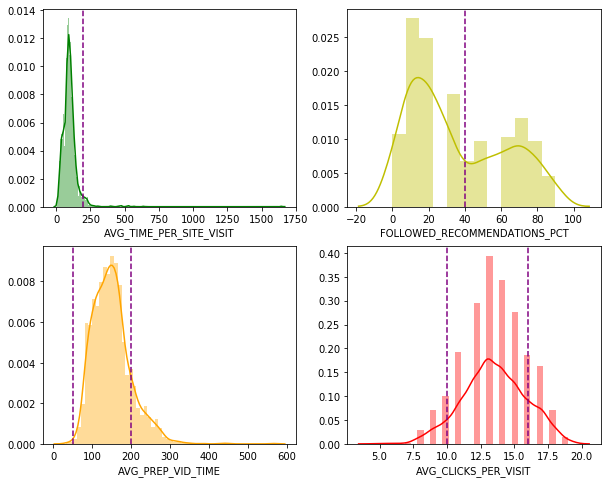

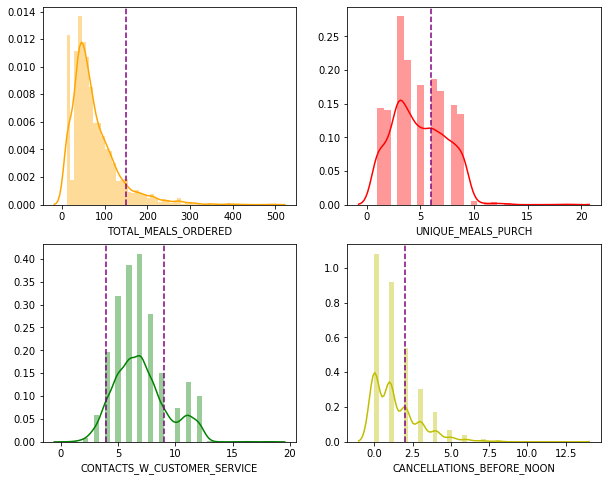

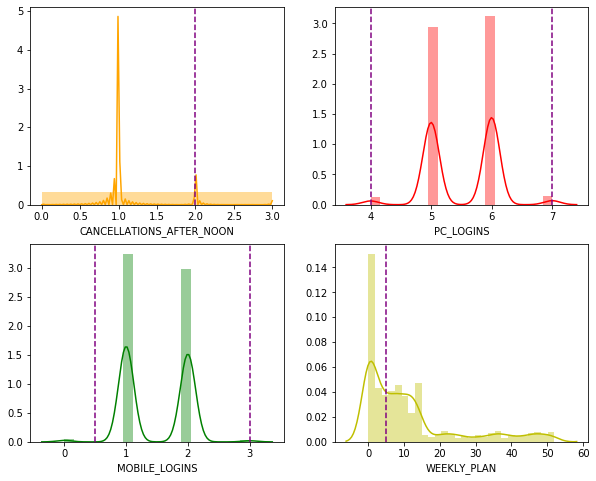

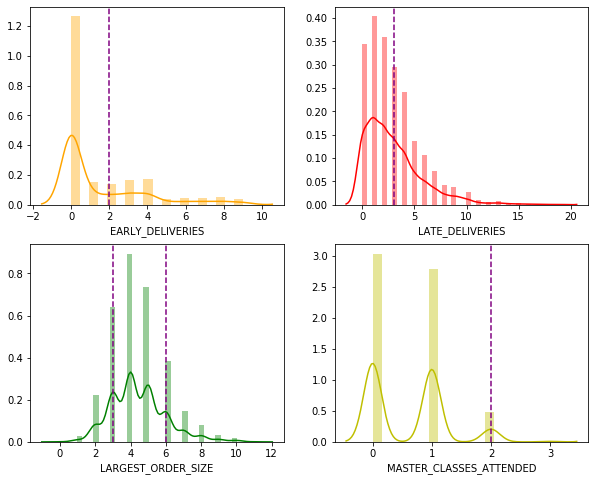

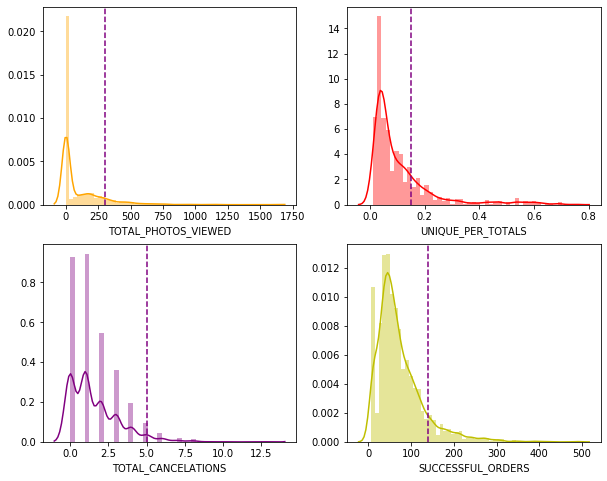

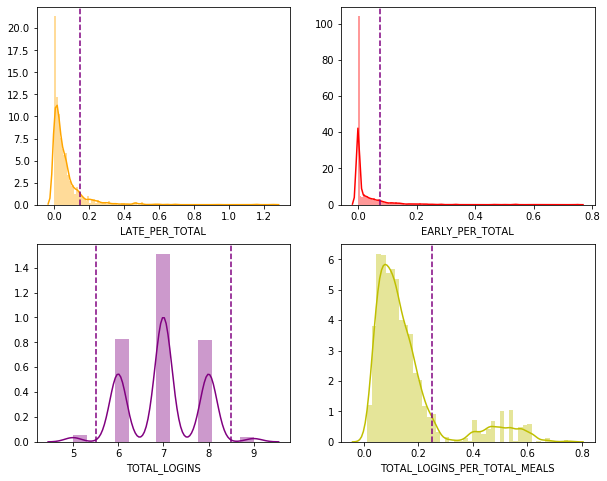

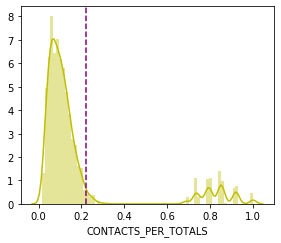

In [32]:
########################
# Visual EDA (Histograms)
########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')

# labeling axis
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

# outlier thresholds
plt.axvline(x = AVG_TIME_PER_SITE_VISIT_HI,
            linestyle = '--',
            color = 'purple')

########################

########################

# developing plot
plt.subplot(2, 2, 2)
sns.distplot(apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

# outlier thresholds
plt.axvline(x = FOLLOWED_RECOMMENDATIONS_PCT_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 3)
sns.distplot(apprentice['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'orange')

# labeling axis
plt.xlabel('AVG_PREP_VID_TIME')

# outlier thresholds
plt.axvline(x = AVG_PREP_VID_TIME_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = AVG_PREP_VID_TIME_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 4)
sns.distplot(apprentice['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'r')

# labeling axis
plt.xlabel('AVG_CLICKS_PER_VISIT')

# outlier thresholds
plt.axvline(x = AVG_CLICKS_PER_VISIT_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = AVG_CLICKS_PER_VISIT_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 1 of 7.png')

# plotting
plt.show()


########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'orange')

# labeling axis
plt.xlabel('TOTAL_MEALS_ORDERED')

# outlier thresholds
plt.axvline(x = TOTAL_MEALS_ORDERED_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 2)
sns.distplot(apprentice['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'r')

# labeling axis
plt.xlabel('UNIQUE_MEALS_PURCH')

# outlier thresholds
plt.axvline(x = UNIQUE_MEALS_PURCH_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 3)
sns.distplot(apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')

# labeling axis
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

# outlier thresholds
plt.axvline(x = CONTACTS_W_CUSTOMER_SERVICE_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = CONTACTS_W_CUSTOMER_SERVICE_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 4)
sns.distplot(apprentice['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

# outlier thresholds
plt.axvline(x = CANCELLATIONS_BEFORE_NOON_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 2 of 7.png')

# plotting
plt.show()


########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'orange')

# labeling axis
plt.xlabel('CANCELLATIONS_AFTER_NOON')

# outlier thresholds
plt.axvline(x = CANCELLATIONS_AFTER_NOON_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 2)
sns.distplot(apprentice['PC_LOGINS'],
             bins  = 'fd',
             color = 'r')

# labeling axis
plt.xlabel('PC_LOGINS')

# outlier thresholds
plt.axvline(x = PC_LOGINS_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = PC_LOGINS_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 3)
sns.distplot(apprentice['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'g')

# labeling axis
plt.xlabel('MOBILE_LOGINS')

# outlier thresholds
plt.axvline(x = MOBILE_LOGINS_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = MOBILE_LOGINS_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 4)
sns.distplot(apprentice['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('WEEKLY_PLAN')

# outlier thresholds
plt.axvline(x = WEEKLY_PLAN_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 3 of 7.png')

# plotting
plt.show()


########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['EARLY_DELIVERIES'],
             bins  = 'fd',
             color = 'orange')

# labeling axis
plt.xlabel('EARLY_DELIVERIES')

# outlier thresholds
plt.axvline(x = EARLY_DELIVERIES_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 2)
sns.distplot(apprentice['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'r')

# labeling axis
plt.xlabel('LATE_DELIVERIES')

# outlier thresholds
plt.axvline(x = LATE_DELIVERIES_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 3)
sns.distplot(apprentice['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')

# labeling axis
plt.xlabel('LARGEST_ORDER_SIZE')

# outlier thresholds
plt.axvline(x = LARGEST_ORDER_SIZE_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = LARGEST_ORDER_SIZE_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 4)
sns.distplot(apprentice['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('MASTER_CLASSES_ATTENDED')

# outlier thresholds
plt.axvline(x = MASTER_CLASSES_ATTENDED_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 4 of 7.png')

# plotting
plt.show()

########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'orange')

# labeling axis
plt.xlabel('TOTAL_PHOTOS_VIEWED')

# outlier thresholds
plt.axvline(x = TOTAL_PHOTOS_VIEWED_HI,
            linestyle = '--',
            color = 'purple')

########################

########################

# developing plot
plt.subplot(2, 2, 2)
sns.distplot(apprentice['UNIQUE_PER_TOTALS'],
             bins  = 'fd',
             color = 'r')

# labeling axis
plt.xlabel('UNIQUE_PER_TOTALS')

# outlier thresholds
plt.axvline(x = UNIQUE_PER_TOTALS_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 3)
sns.distplot(apprentice['TOTAL_CANCELATIONS'],
             bins  = 'fd',
             color = 'purple')

# labeling axis
plt.xlabel('TOTAL_CANCELATIONS')

# outlier thresholds
plt.axvline(x = TOTAL_CANCELATIONS_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 4)
sns.distplot(apprentice['SUCCESSFUL_ORDERS'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('SUCCESSFUL_ORDERS')

# outlier thresholds
plt.axvline(x = SUCCESSFUL_ORDERS_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 5 of 7.png')

#plotting
plt.show()


########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['LATE_PER_TOTAL'],
             bins  = 'fd',
             color = 'orange')

# labeling axis
plt.xlabel('LATE_PER_TOTAL')

# outlier thresholds
plt.axvline(x = LATE_PER_TOTAL_HI,
            linestyle = '--',
            color = 'purple')

########################

########################

# developing plot
plt.subplot(2, 2, 2)
sns.distplot(apprentice['EARLY_PER_TOTAL'],
             bins  = 'fd',
             color = 'r')

# labeling axis
plt.xlabel('EARLY_PER_TOTAL')

# outlier thresholds
plt.axvline(x = EARLY_PER_TOTAL_HI,
            linestyle = '--',
            color = 'purple')


########################

########################

# developing plot
plt.subplot(2, 2, 3)
sns.distplot(apprentice['TOTAL_LOGINS'],
             bins  = 'fd',
             color = 'purple')

# labeling axis
plt.xlabel('TOTAL_LOGINS')

# outlier thresholds
plt.axvline(x = TOTAL_LOGINS_LOW,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = TOTAL_LOGINS_HI,
            linestyle = '--',
            color = 'purple')

########################

########################

# developing plot
plt.subplot(2, 2, 4)
sns.distplot(apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('TOTAL_LOGINS_PER_TOTAL_MEALS')

# outlier thresholds
plt.axvline(x = TOTAL_LOGINS_PER_TOTAL_MEALS_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 6 of 7.png')

#plotting
plt.show()


########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.distplot(apprentice['CONTACTS_PER_TOTALS'],
             bins  = 'fd',
             color = 'y')

# labeling axis
plt.xlabel('CONTACTS_PER_TOTALS')

# outlier thresholds
plt.axvline(x = CONTACTS_PER_TOTALS_HI,
            linestyle = '--',
            color = 'purple')


# saving figure
plt.savefig('Apprentice Histograms with thresholds 7 of 7.png')

#plotting
plt.show()






<br>

<h3> Trend-Based Features </h3>

Let's check now trends between our dependent variable (LN_REVENUE) and the independent variables. Using scatterplots with a very similar for loop like the one used in the outlier analysis.

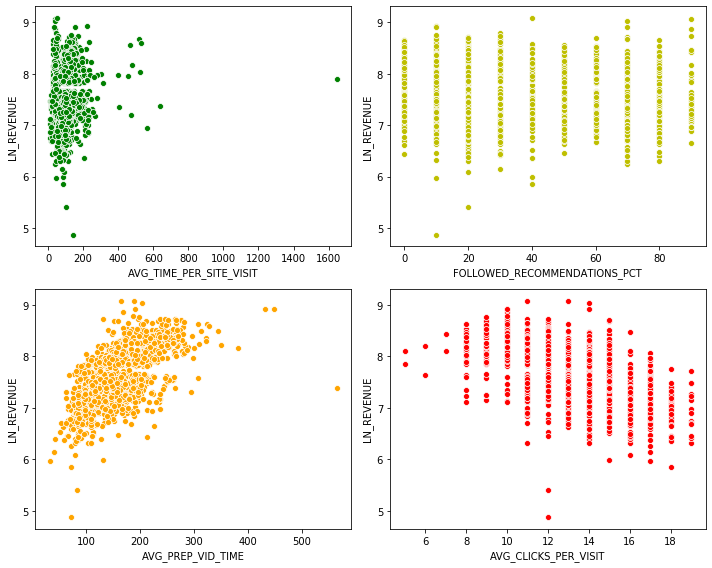

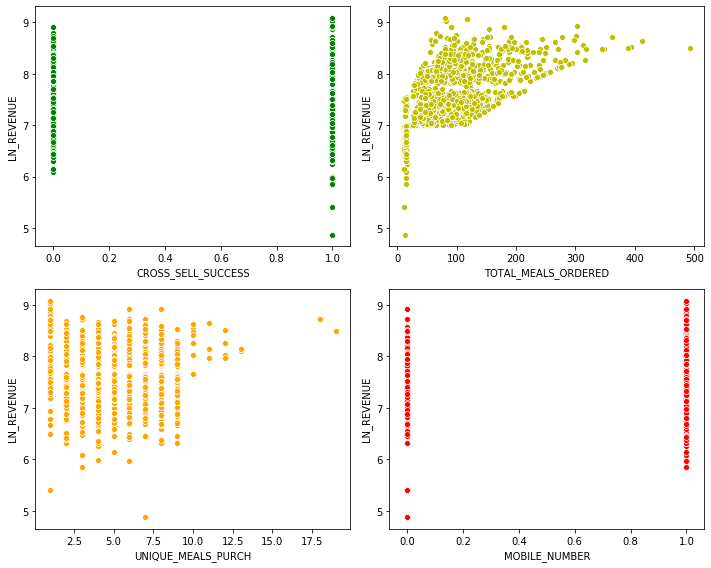

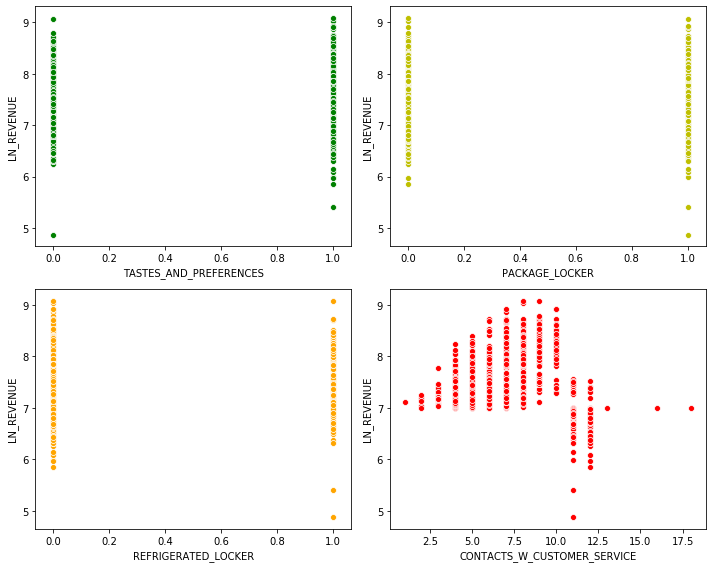

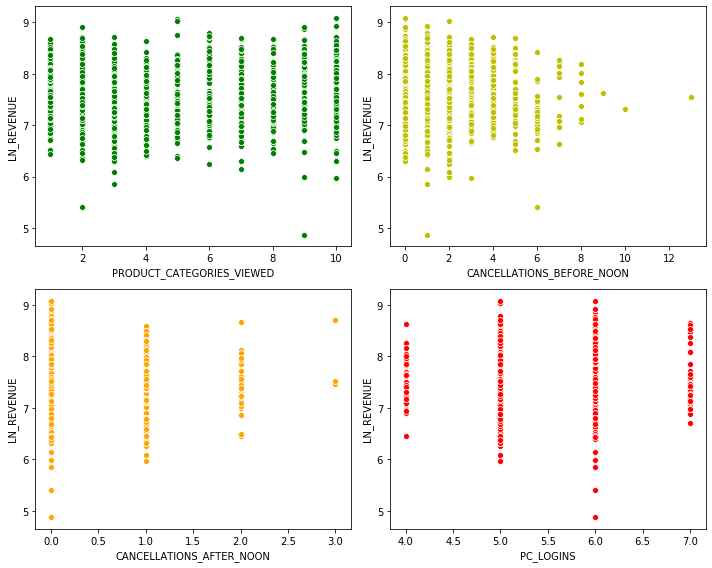

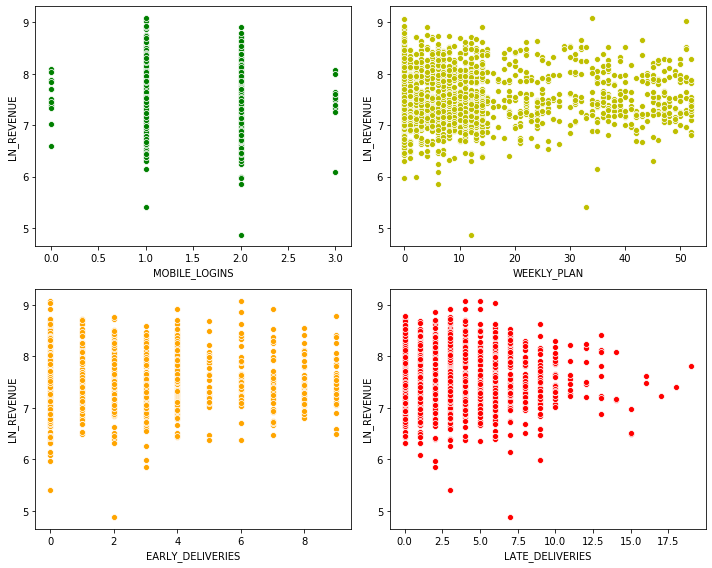

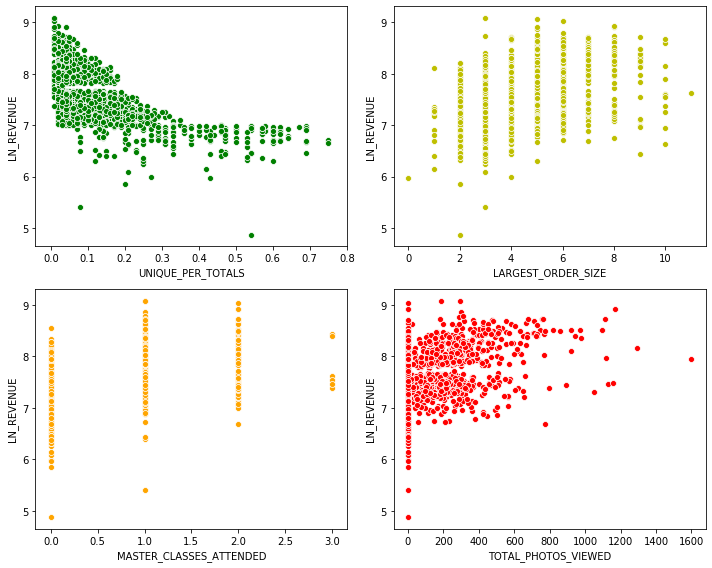

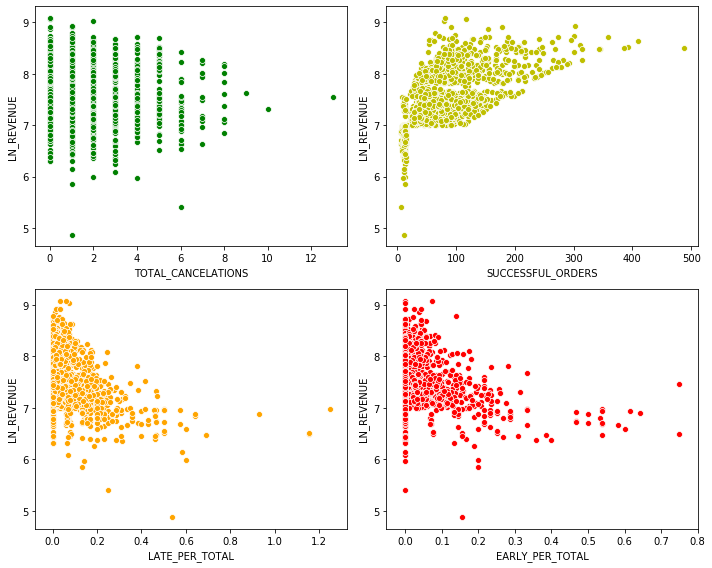

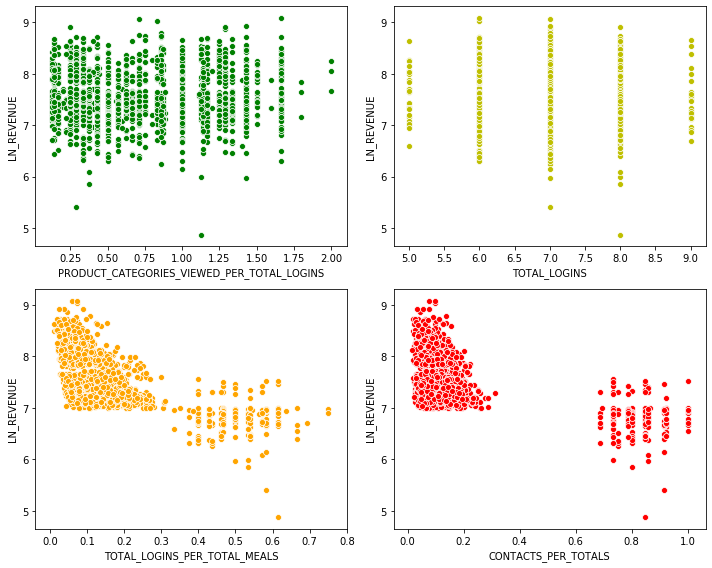

In [33]:
########################
# Visual EDA (Scatterplots)
########################

scatterplots = histograms


loop = 0

for a,b,c,d in scatterplots:

    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.scatterplot(x = apprentice[a],
                    y = apprentice['LN_REVENUE'],
                    color = 'g')
    plt.xlabel(a)

    ########################

    plt.subplot(2, 2, 2)
    sns.scatterplot(x = apprentice[b],
                    y = apprentice['LN_REVENUE'],
                    color = 'y')
    plt.xlabel(b)

    ########################

    plt.subplot(2, 2, 3)
    sns.scatterplot(x = apprentice[c],
                    y = apprentice['LN_REVENUE'],
                    color = 'orange')
    plt.xlabel(c)

    ########################
    plt.subplot(2, 2, 4)
    sns.scatterplot(x = apprentice[d],
                    y = apprentice['LN_REVENUE'],
                    color = 'r')
    plt.xlabel(d)
    plt.tight_layout()
    
    
    # Adding 1 to the loop variable so it save every time the loop runs different variables
    loop +=1

    plt.savefig(f'Apprentice Data Scatterplots {loop}.png')
    
    plt.show()
    
    


<br>

<h3> Trend-Based Thresholds </h3>

Creating new columns to separate the outliers from the largest trends of each variable. I'm doing it using a for loop like the one used for outlier thresholds.

In [34]:
# Creating trend-based thresholds

AVG_TIME_PER_SITE_VISIT_CHANGE_HI         =     300          # data scatters above this point
AVG_PREP_VID_TIME_CHANGE_HI               =     300          # data scatters above this point
TOTAL_MEALS_ORDERED_CHANGE_HI             =     200          # data scatters above this point
TOTAL_PHOTOS_VIEWED_CHANGE_HI             =     500          # data scatters above this point
FOLLOWED_RECOMMENDATIONS_PCT_CHANGE_HI    =     30           # trend changes above this point
AVG_CLICKS_PER_VISIT_CHANGE_HI            =     11           # trend changes above this point
CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI     =     10           # trend changes above this point
LARGEST_ORDER_SIZE_CHANGE_HI              =     7            # trend changes above this point
UNIQUE_PER_TOTALS_CHANGE_HI               =     0.3          # trend changes above this point
LATE_PER_TOTAL_CHANGE_HI                  =     0.4          # trend changes above this point
EARLY_PER_TOTAL_CHANGE_HI                 =     0.3          # trend changes above this point
TOTAL_LOGINS_PER_TOTAL_MEALS_CHANGE_HI    =     0.3          # trend changes above this point       
CONTACTS_PER_TOTALS_CHANGE_HI             =     0.4          # trend changes above this point 


WEEKLY_PLAN_CHANGE_AT                     =     0            # zero inflated
UNIQUE_MEALS_PURCH_CHANGE_AT              =     0            # zero inflated
PC_LOGINS_CHANGE_AT                       =     7            # different at 7
MOBILE_LOGINS_CHANGE_AT                   =     3            # different at 3
MASTER_CLASSES_ATTENDED_CHANGE_AT         =     3            # different at 3
TOTAL_PHOTOS_VIEWED_CHANGE_AT             =     0            # zero inflated
SUCCESSFUL_ORDERS_CHANGE_AT               =     20           # 30 inflated
EARLY_PER_TOTAL_CHANGE_AT                 =     0            # zero inflated



# Creating a list with all the thresholds to ease the funcitionality of the for loop:
outliers_2 = [['AVG_TIME_PER_SITE_VISIT_CHANGE_HI', AVG_TIME_PER_SITE_VISIT_CHANGE_HI],
              ['AVG_PREP_VID_TIME_CHANGE_HI', AVG_PREP_VID_TIME_CHANGE_HI],
              ['TOTAL_MEALS_ORDERED_CHANGE_HI', TOTAL_MEALS_ORDERED_CHANGE_HI],
              ['TOTAL_PHOTOS_VIEWED_CHANGE_HI', TOTAL_PHOTOS_VIEWED_CHANGE_HI],
              ['FOLLOWED_RECOMMENDATIONS_PCT_CHANGE_HI', FOLLOWED_RECOMMENDATIONS_PCT_CHANGE_HI],
              ['AVG_CLICKS_PER_VISIT_CHANGE_HI', AVG_CLICKS_PER_VISIT_CHANGE_HI],
              ['CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI', CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI],
              ['LARGEST_ORDER_SIZE_CHANGE_HI', LARGEST_ORDER_SIZE_CHANGE_HI],
              ['UNIQUE_PER_TOTALS_CHANGE_HI', UNIQUE_PER_TOTALS_CHANGE_HI],
              ['LATE_PER_TOTAL_CHANGE_HI', LATE_PER_TOTAL_CHANGE_HI],
              ['EARLY_PER_TOTAL_CHANGE_HI', EARLY_PER_TOTAL_CHANGE_HI],
              ['TOTAL_LOGINS_PER_TOTAL_MEALS_CHANGE_HI',TOTAL_LOGINS_PER_TOTAL_MEALS_CHANGE_HI],
              ['CONTACTS_PER_TOTALS_CHANGE_HI', CONTACTS_PER_TOTALS_CHANGE_HI],
              ['WEEKLY_PLAN_CHANGE_AT', WEEKLY_PLAN_CHANGE_AT],
              ['UNIQUE_MEALS_PURCH_CHANGE_AT', UNIQUE_MEALS_PURCH_CHANGE_AT],
              ['PC_LOGINS_CHANGE_AT', PC_LOGINS_CHANGE_AT],
              ['MOBILE_LOGINS_CHANGE_AT', MOBILE_LOGINS_CHANGE_AT],
              ['MASTER_CLASSES_ATTENDED_CHANGE_AT', MASTER_CLASSES_ATTENDED_CHANGE_AT],
              ['TOTAL_PHOTOS_VIEWED_CHANGE_AT', TOTAL_PHOTOS_VIEWED_CHANGE_AT],
              ['SUCCESSFUL_ORDERS_CHANGE_AT', SUCCESSFUL_ORDERS_CHANGE_AT],
              ['EARLY_PER_TOTAL_CHANGE_AT', EARLY_PER_TOTAL_CHANGE_AT]]



##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

# for loop to develope features (columns) for outliers

for x,y in outliers_2:
    
    change = 'CHANGE_' + x
    
    ########################################
    ## change above threshold             ##
    ########################################
    if 'HI' in x:
        apprentice[change.replace('_CHANGE_HI', '')] = 0
        
        condition  = apprentice.loc[0:, change.replace('_CHANGE_HI', '')][apprentice[x.replace('_CHANGE_HI', '')] > y]
        
        apprentice[change.replace('_CHANGE_HI', '')].replace(to_replace = condition,
                                            value      = 1,
                                            inplace    = True)
    
    ########################################
    ## change at threshold                ##
    ########################################
    elif 'AT' in x:
        apprentice[change.replace('_CHANGE_AT', '')] = 0
        
        condition = apprentice.loc[0:, change.replace('_CHANGE_AT', '')][apprentice[x.replace('_CHANGE_AT', '')] == y]
        
        apprentice[change.replace('_CHANGE_AT', '')].replace(to_replace = condition,
                                                      value      = 1,
                                                      inplace    = True)

        
        


<br>

Let´s plot again the scatterplots with the new thresholds!

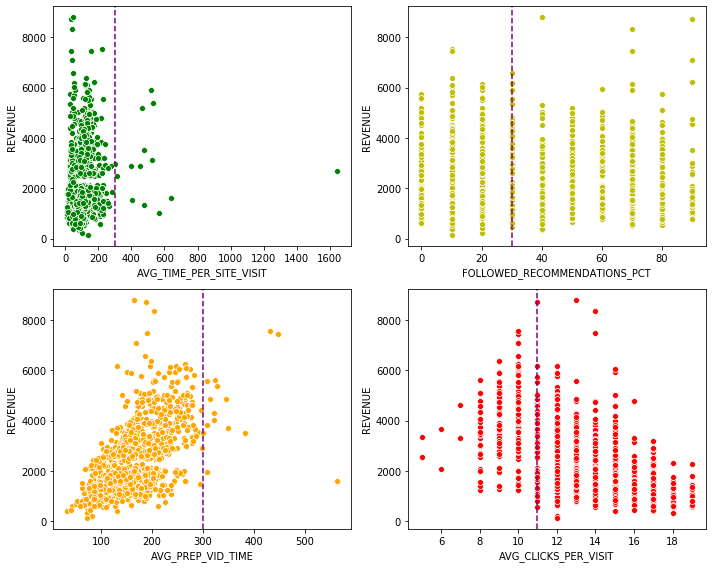

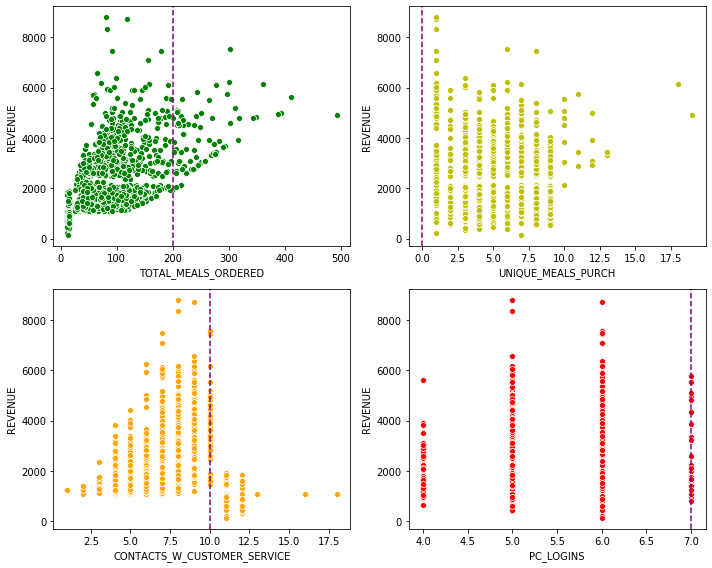

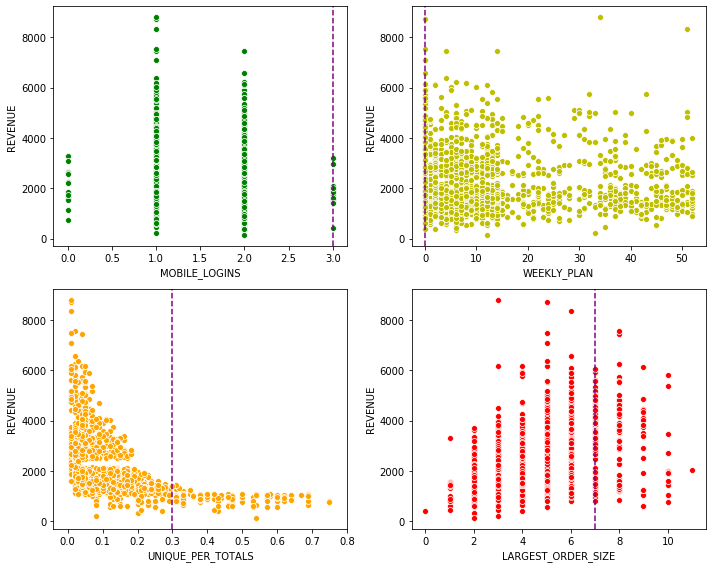

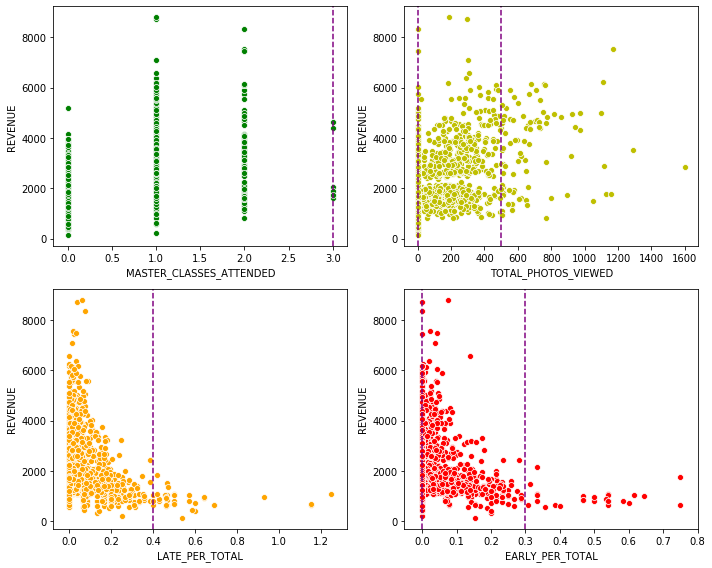

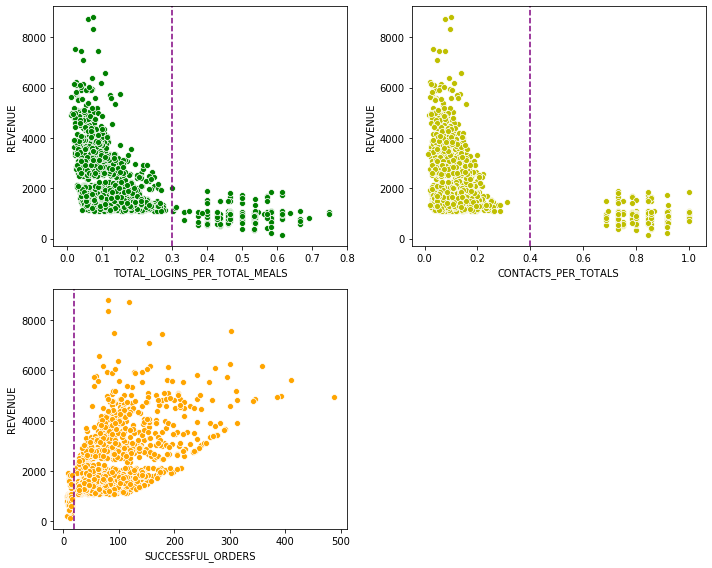

In [35]:
# Plotting the scatterplots with the new thresholds

########################
# Visual EDA (Scatterplots)
########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['AVG_TIME_PER_SITE_VISIT'],
                y = apprentice['REVENUE'],
                color = 'g')

# labeling axis
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

# outlier thresholds
plt.axvline(x = AVG_TIME_PER_SITE_VISIT_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = apprentice['REVENUE'],
                color = 'y')

# labeling axis
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

# outlier thresholds
plt.axvline(x = FOLLOWED_RECOMMENDATIONS_PCT_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['AVG_PREP_VID_TIME'],
                y = apprentice['REVENUE'],
                color = 'orange')

# labeling axis
plt.xlabel('AVG_PREP_VID_TIME')

# outlier thresholds
plt.axvline(x = AVG_PREP_VID_TIME_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['AVG_CLICKS_PER_VISIT'],
                y = apprentice['REVENUE'],
                color = 'r')

# labeling axis
plt.xlabel('AVG_CLICKS_PER_VISIT')

# outlier thresholds
plt.axvline(x = AVG_CLICKS_PER_VISIT_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


# adjusting subplot parameters
plt.tight_layout()

# saving figure
plt.savefig('Apprentice Data Scatterplots with thresholds 1 of 5.png')

#plotting
plt.show()

########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_MEALS_ORDERED'],
                y = apprentice['REVENUE'],
                color = 'g')

# labeling axis
plt.xlabel('TOTAL_MEALS_ORDERED')

# outlier thresholds
plt.axvline(x = TOTAL_MEALS_ORDERED_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['UNIQUE_MEALS_PURCH'],
                y = apprentice['REVENUE'],
                color = 'y')

# labeling axis
plt.xlabel('UNIQUE_MEALS_PURCH')

# outlier thresholds
plt.axvline(x = UNIQUE_MEALS_PURCH_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['CONTACTS_W_CUSTOMER_SERVICE'],
                y = apprentice['REVENUE'],
                color = 'orange')

# labeling axis
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

# outlier thresholds
plt.axvline(x = CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['PC_LOGINS'],
                y = apprentice['REVENUE'],
                color = 'r')

# labeling axis
plt.xlabel('PC_LOGINS')

# outlier thresholds
plt.axvline(x = PC_LOGINS_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


# adjusting subplot parameters
plt.tight_layout()

# saving figure
plt.savefig('Apprentice Data Scatterplots with thresholds 2 of 5.png')

#plotting
plt.show()

########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['MOBILE_LOGINS'],
                y = apprentice['REVENUE'],
                color = 'g')

# labeling axis
plt.xlabel('MOBILE_LOGINS')

# outlier thresholds
plt.axvline(x = MOBILE_LOGINS_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['WEEKLY_PLAN'],
                y = apprentice['REVENUE'],
                color = 'y')

# labeling axis
plt.xlabel('WEEKLY_PLAN')

# outlier thresholds
plt.axvline(x = WEEKLY_PLAN_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['UNIQUE_PER_TOTALS'],
                y = apprentice['REVENUE'],
                color = 'orange')

# labeling axis
plt.xlabel('UNIQUE_PER_TOTALS')

# outlier thresholds
plt.axvline(x = UNIQUE_PER_TOTALS_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['LARGEST_ORDER_SIZE'],
                y = apprentice['REVENUE'],
                color = 'r')

# labeling axis
plt.xlabel('LARGEST_ORDER_SIZE')

# outlier thresholds
plt.axvline(x = LARGEST_ORDER_SIZE_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


# adjusting subplot parameters
plt.tight_layout()

# saving figure
plt.savefig('Apprentice Data Scatterplots with thresholds 3 of 5.png')

#plotting
plt.show()

########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['MASTER_CLASSES_ATTENDED'],
                y = apprentice['REVENUE'],
                color = 'g')

# labeling axis
plt.xlabel('MASTER_CLASSES_ATTENDED')

# outlier thresholds
plt.axvline(x = MASTER_CLASSES_ATTENDED_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['TOTAL_PHOTOS_VIEWED'],
                y = apprentice['REVENUE'],
                color = 'y')

# labeling axis
plt.xlabel('TOTAL_PHOTOS_VIEWED')

# outlier thresholds
plt.axvline(x = TOTAL_PHOTOS_VIEWED_CHANGE_HI,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = TOTAL_PHOTOS_VIEWED_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['LATE_PER_TOTAL'],
                y = apprentice['REVENUE'],
                color = 'orange')

# labeling axis
plt.xlabel('LATE_PER_TOTAL')

# outlier thresholds
plt.axvline(x = LATE_PER_TOTAL_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 4)
sns.scatterplot(x = apprentice['EARLY_PER_TOTAL'],
                y = apprentice['REVENUE'],
                color = 'r')

# labeling axis
plt.xlabel('EARLY_PER_TOTAL')

# outlier thresholds
plt.axvline(x = EARLY_PER_TOTAL_CHANGE_HI,
            linestyle = '--',
            color = 'purple')

plt.axvline(x = EARLY_PER_TOTAL_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


# adjusting subplot parameters
plt.tight_layout()

# saving figure
plt.savefig('Apprentice Data Scatterplots with thresholds 4 of 5.png')

#plotting
plt.show()


########################

########################

# setting plots size
fig, ax = plt.subplots(figsize = (10, 8))

# developing plot
plt.subplot(2, 2, 1)
sns.scatterplot(x = apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS'],
                y = apprentice['REVENUE'],
                color = 'g')

# labeling axis
plt.xlabel('TOTAL_LOGINS_PER_TOTAL_MEALS')

# outlier thresholds
plt.axvline(x = TOTAL_LOGINS_PER_TOTAL_MEALS_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 2)
sns.scatterplot(x = apprentice['CONTACTS_PER_TOTALS'],
                y = apprentice['REVENUE'],
                color = 'y')

# labeling axis
plt.xlabel('CONTACTS_PER_TOTALS')

# outlier thresholds
plt.axvline(x = CONTACTS_PER_TOTALS_CHANGE_HI,
            linestyle = '--',
            color = 'purple')


########################

# developing plot
plt.subplot(2, 2, 3)
sns.scatterplot(x = apprentice['SUCCESSFUL_ORDERS'],
                y = apprentice['REVENUE'],
                color = 'orange')

# labeling axis
plt.xlabel('SUCCESSFUL_ORDERS')

# outlier thresholds
plt.axvline(x = SUCCESSFUL_ORDERS_CHANGE_AT,
            linestyle = '--',
            color = 'purple')


# adjusting subplot parameters
plt.tight_layout()

# saving figure
plt.savefig('Apprentice Data Scatterplots with thresholds 5 of 5.png')

#plotting
plt.show()





<h3> Dummies from Categorical Variables </h3>

We are going to get the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html">dummies</a> of the *DOMAIN_GROUP* and *MEDIAN_MEAL_RATING*, and then remove (with drop) the column from the dataframe and add it to the dataframe.



In [36]:
# One hot encoding categorical variables

# Domain groups
ONE_HOT_DOMAIN_GROUP       = pd.get_dummies(apprentice['DOMAIN_GROUP'])


# Median meal rating
ONE_HOT_MEDIAN_MEAL_RATING = pd.get_dummies(apprentice['MEDIAN_MEAL_RATING'],drop_first=True)

# Column names
ONE_HOT_MEDIAN_MEAL_RATING.columns = ['MEDIAN_MEAL_RATING_2',
                                      'MEDIAN_MEAL_RATING_3',
                                      'MEDIAN_MEAL_RATING_4',
                                      'MEDIAN_MEAL_RATING_5']


# Dropping categorical variables after they've been encoded
apprentice = apprentice.drop('DOMAIN_GROUP', axis = 1)

# I'm not going to drop MEDIAN_MEAL_RATING because I'm using it in some models
#apprentice = apprentice.drop('MEDIAN_MEAL_RATING', axis = 1)


# Joining codings together
apprentice = apprentice.join([ONE_HOT_DOMAIN_GROUP])

apprentice = apprentice.join(ONE_HOT_MEDIAN_MEAL_RATING)





<h2> Model Development </h2>

<h3> Plotting Correlations </h3>

Checking the correlations between the dependent variable *LN_REVENUE* and the independent variables.



In [40]:
# Let's plot some correlations

df_corr = apprentice.corr().round(2)

# printing (Pearson) correlations with REVENUE
print(df_corr.loc['LN_REVENUE'].sort_values(ascending = False))

LN_REVENUE                                    1.00
REVENUE                                       0.95
AVG_PREP_VID_TIME                             0.65
MEDIAN_MEAL_RATING                            0.65
SUCCESSFUL_ORDERS                             0.61
TOTAL_MEALS_ORDERED                           0.61
POS_CORR                                      0.56
MEDIAN_MEAL_RATING_4                          0.53
MASTER_CLASSES_ATTENDED                       0.47
OUT_AVG_PREP_VID_TIME                         0.46
LARGEST_ORDER_SIZE                            0.45
TOTAL_PHOTOS_VIEWED                           0.43
OUT_TOTAL_MEALS_ORDERED                       0.39
OUT_SUCCESSFUL_ORDERS                         0.39
OUT_TOTAL_PHOTOS_VIEWED                       0.35
CHANGE_TOTAL_MEALS_ORDERED                    0.31
OUT_LARGEST_ORDER_SIZE                        0.27
CHANGE_LARGEST_ORDER_SIZE                     0.17
CHANGE_AVG_PREP_VID_TIME                      0.15
AVG_TIME_PER_SITE_VISIT        

<br>

Adding two more calculated fields with the new thresholds, **based on corr its correlation with *LN_REVENUE.***

In [38]:
# Corr < -0.5

apprentice['NEG_CORR'] = 0


condition_neg = apprentice.loc[0:, 'NEG_CORR'][apprentice['UNIQUE_PER_TOTALS'] >= 0.11] \
                [apprentice['AVG_CLICKS_PER_VISIT'] > 13.5] \
                [apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'] == 1] 


apprentice['NEG_CORR'].replace(to_replace = condition_neg,
                                value      = 1,
                                inplace    = True)


apprentice['NEG_CORR'].value_counts()



0    1782
1     164
Name: NEG_CORR, dtype: int64

In [39]:
# Corr > 0.5

apprentice['POS_CORR'] = 0


condition_pos = apprentice.loc[0:, 'POS_CORR'][apprentice['AVG_PREP_VID_TIME'] > 150]\
                [apprentice['MEDIAN_MEAL_RATING'] >= 4][apprentice['TOTAL_MEALS_ORDERED'] > 60] 


apprentice['POS_CORR'].replace(to_replace = condition_pos,
                                value      = 1,
                                inplace    = True)


apprentice['POS_CORR'].value_counts()



0    1723
1     223
Name: POS_CORR, dtype: int64

<br>

Saving the final dataset with all the variables created in a new file called: *apprentice_final.xlsx*.<br><br>
*
This is just a safety measure.

In [41]:
# saving results
apprentice.to_excel('Apprentice_Final.xlsx',
                     index = False)

Loading the file again, to continue with the analysis.

In [42]:
# loading saved file
apprentice = pd.read_excel('Apprentice_Final.xlsx')

<br>

Checking the final dataframe with all the variables.

In [43]:
apprentice.head(n = 5)

REVENUE  CROSS_SELL_SUCCESS                              NAME                                     EMAIL FIRST_NAME  FAMILY_NAME  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED     EMAIL_DOMAIN  LN_REVENUE  BAD_CUST  GOOD_CUST  UNIQUE_PER_TOTALS  TOTAL_CANCELATIONS  SUCCESSFUL_ORDERS  LATE_PER_TOTAL  EARLY_PER_TOTAL  PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS  TOTAL_LOGINS  TOTAL_LOGINS_PER_TOTAL_MEALS  CONTACTS_PER_TOTALS  OUT_AVG_TIME_PER_SITE_VISIT  OUT_AVG_PREP_VID_TIME  OUT_AVG_CLICKS_PER_VISIT  OUT_TOTAL_MEALS_ORDERED  OUT_UNIQUE_MEALS_PURCH  \
0   1880.0                   1                      Addam Osgrey                 addam.osgrey@passport.com      Addam       Osgrey                  118                   4                            7                          5                    86.00              1                          2                         1                       0          6              2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0     passport.com    7.539027         0          0               0.03                   3                115        0.016949         0.000000                                    0.625000             8                      0.067797             0.059322                            0                      0                         0                        0                       0   
1   1495.0                   1                   Aegon Blackfyre                   aegon.blackfyre@jnj.com      Aegon    Blackfyre                   44                   3                            6                          3                   125.60              1                          0                         1                       0          6              1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90          jnj.com    7.309881         0          1               0.07                   1                 43        0.090909         0.000000                                    0.428571             7                      0.159091             0.136364                            0                      0                         0                        0                       0   
2   2572.5                   1         Aegon Frey (son of Aenys)       aegon.frey.(son.of.aenys)@gmail.com      Aegon        Frey                    38                   1                            5                          3                    58.00              1                          5                         0                       1          6              2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0        gmail.com    7.852633         0          0               0.03                   5                 33        0.000000         0.000000                                    0.375000             8                      0.210526             0.131579                            0                      0                         0                        0                       0   
3   1647.0                   1 

<br>

Plotting a **correlation heatmap** between all the columns in apprentice's dataframe.

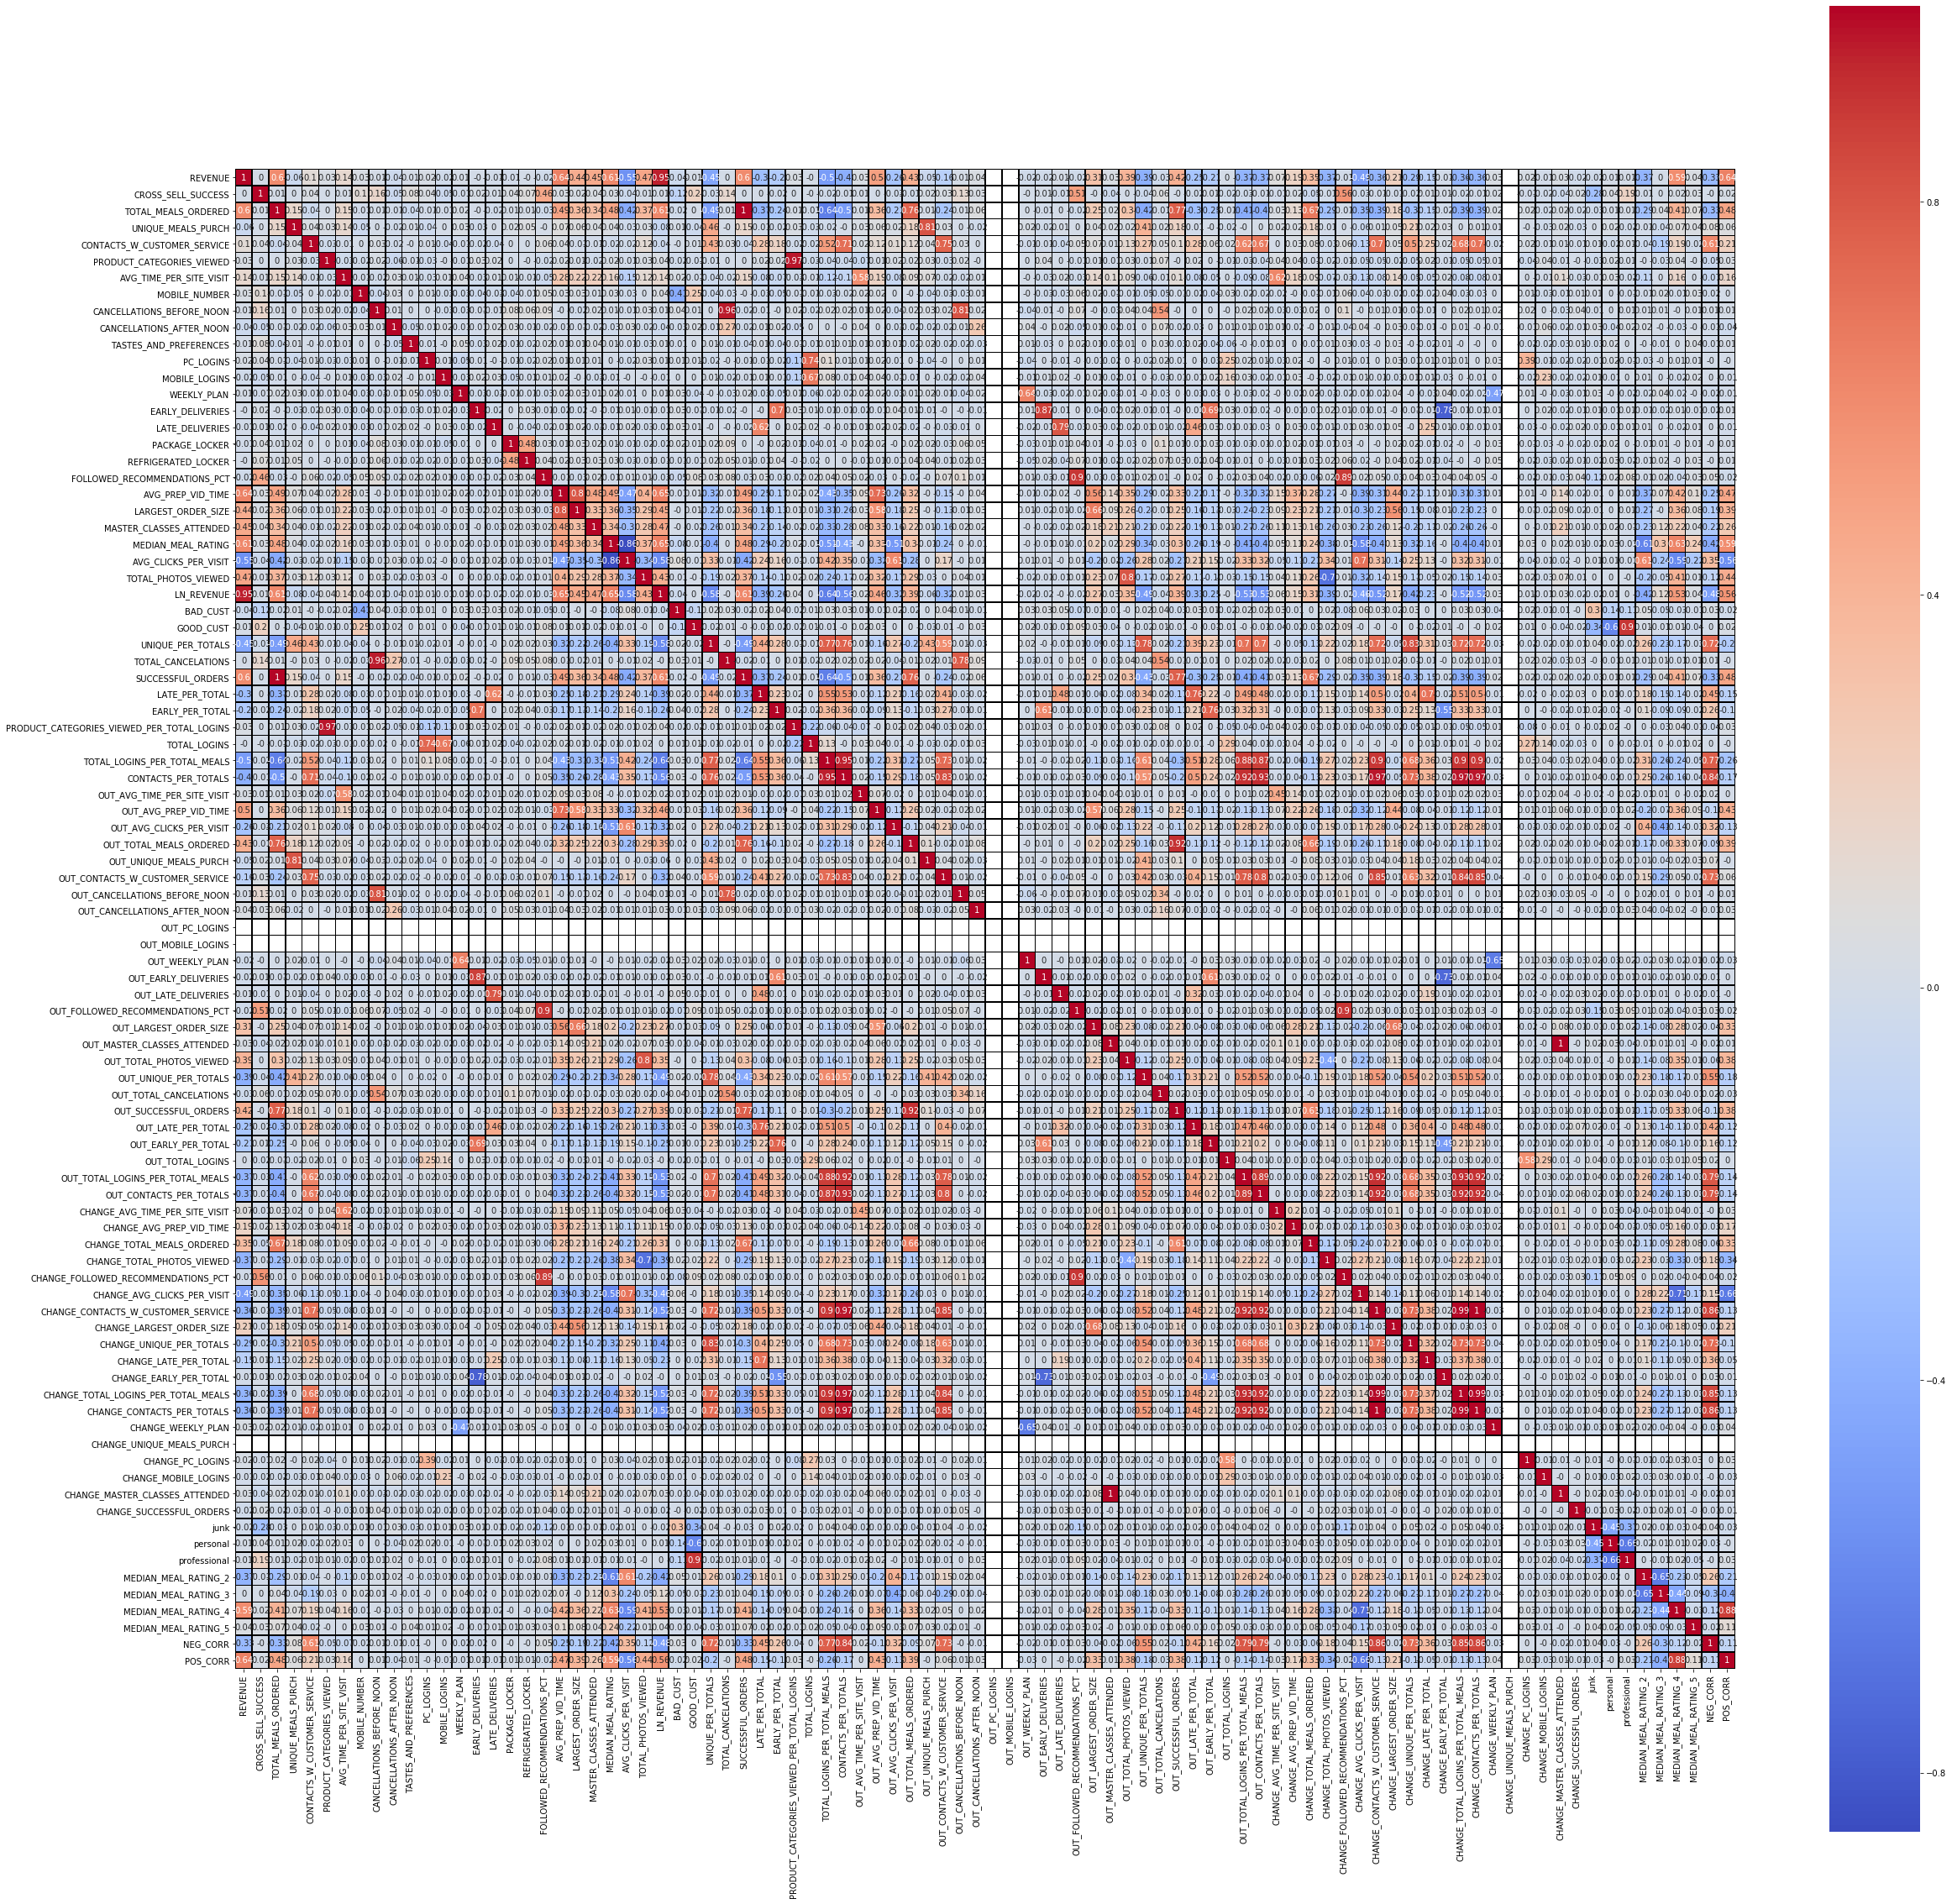

In [47]:
# correlation heatmap

fig, ax = plt.subplots(figsize=(40,40))

df_corr1 = apprentice.corr().round(2)

sns.heatmap(df_corr1,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Apprentice Correlation Heatmap 1 of 2.png')
plt.show()

<br>

There is not that much insight to get from the plot above. That is why I'm going to plot a correlation heatmap, just with the **highest correlated variables.**

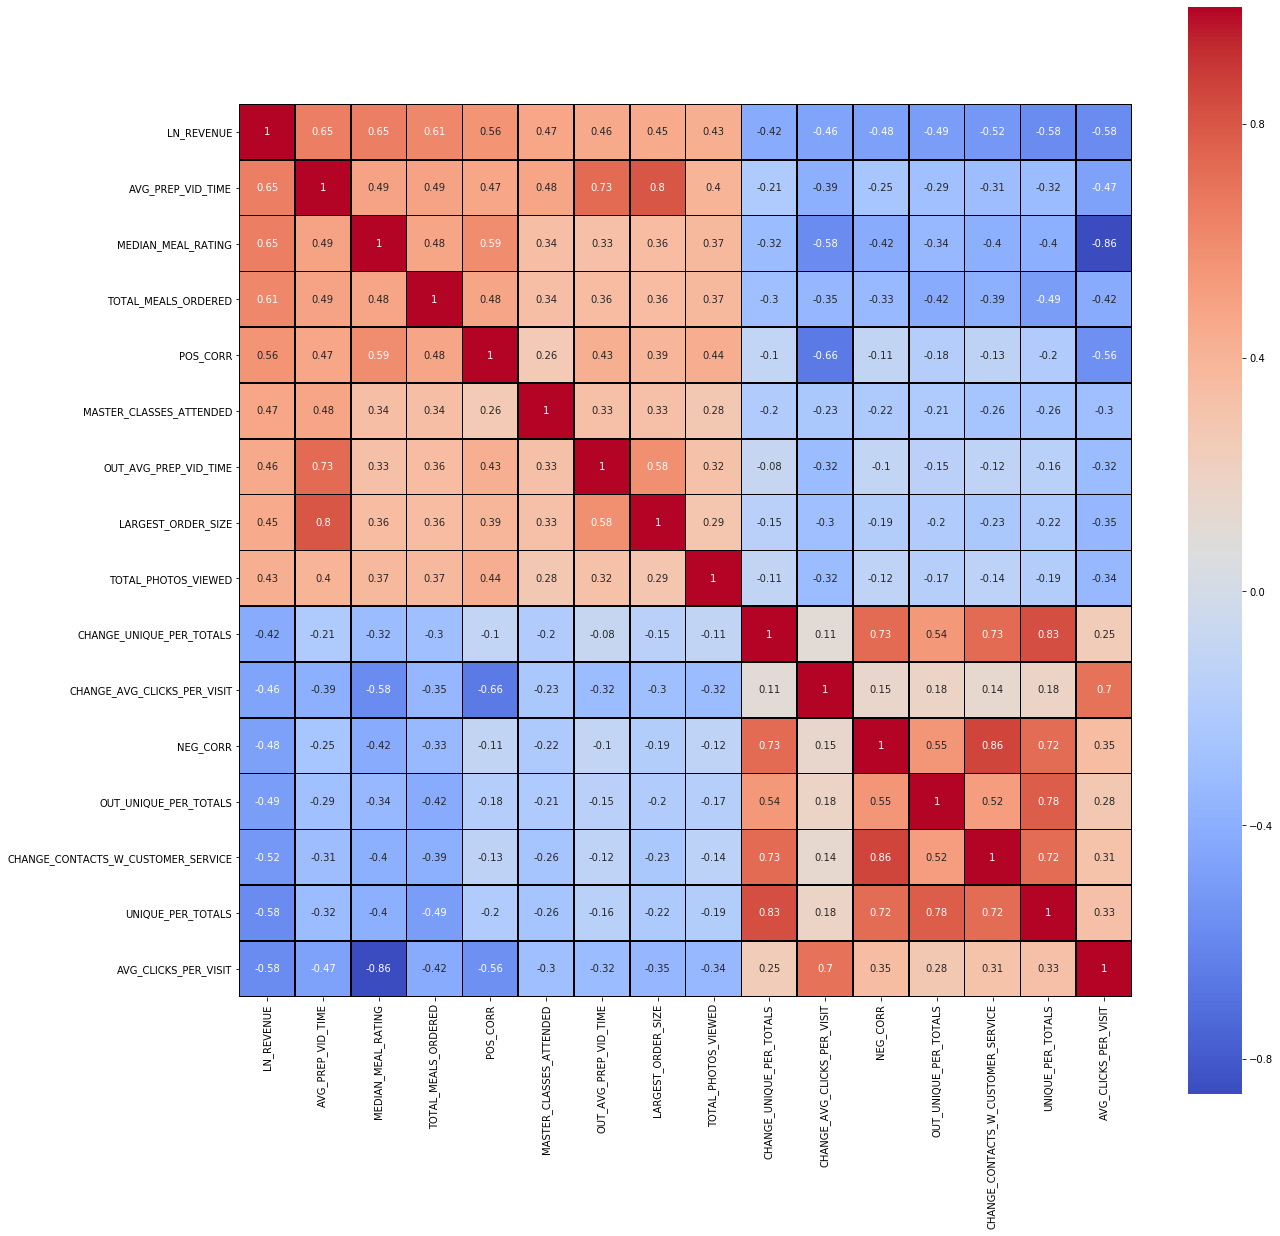

In [49]:
# correlation heatmap

fig, ax = plt.subplots(figsize=(20,20))

df_corr1 = df_corr.loc[['LN_REVENUE', 'AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 
                        'TOTAL_MEALS_ORDERED', 'POS_CORR', 'MASTER_CLASSES_ATTENDED',
                        'OUT_AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'TOTAL_PHOTOS_VIEWED',
                        'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_AVG_CLICKS_PER_VISIT', 'NEG_CORR',
                        'OUT_UNIQUE_PER_TOTALS', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE',
                        'UNIQUE_PER_TOTALS','AVG_CLICKS_PER_VISIT'],
                       ['LN_REVENUE', 'AVG_PREP_VID_TIME', 'MEDIAN_MEAL_RATING', 
                        'TOTAL_MEALS_ORDERED', 'POS_CORR', 'MASTER_CLASSES_ATTENDED',
                        'OUT_AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'TOTAL_PHOTOS_VIEWED',
                        'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_AVG_CLICKS_PER_VISIT', 'NEG_CORR',
                        'OUT_UNIQUE_PER_TOTALS', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE',
                        'UNIQUE_PER_TOTALS','AVG_CLICKS_PER_VISIT']]


sns.heatmap(df_corr1,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)


plt.savefig('Apprentice Correlation Heatmap 2 of 2.png')
plt.show()

<br>

Let's now create a dataframe by dropping those variables that we are not going to use in our analysis. 

In [50]:
# making a copy of apprentice
final_apprentice = apprentice.copy()


# dropping REVENUE, EMAIL, NAME, FIRST_NAME, SECOND_NAME, EMAIL_DOMAIN
final_apprentice = final_apprentice.drop(['REVENUE',
                                          'LN_REVENUE',
                                          'EMAIL',
                                          'NAME',
                                          'FIRST_NAME',
                                          'FAMILY_NAME',
                                          'EMAIL_DOMAIN'],
                                           axis = 1)

final_apprentice.head(n = 5)

CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  UNIQUE_MEALS_PURCH  CONTACTS_W_CUSTOMER_SERVICE  PRODUCT_CATEGORIES_VIEWED  AVG_TIME_PER_SITE_VISIT  MOBILE_NUMBER  CANCELLATIONS_BEFORE_NOON  CANCELLATIONS_AFTER_NOON  TASTES_AND_PREFERENCES  PC_LOGINS  MOBILE_LOGINS  WEEKLY_PLAN  EARLY_DELIVERIES  LATE_DELIVERIES  PACKAGE_LOCKER  REFRIGERATED_LOCKER  FOLLOWED_RECOMMENDATIONS_PCT  AVG_PREP_VID_TIME  LARGEST_ORDER_SIZE  MASTER_CLASSES_ATTENDED  MEDIAN_MEAL_RATING  AVG_CLICKS_PER_VISIT  TOTAL_PHOTOS_VIEWED  BAD_CUST  GOOD_CUST  UNIQUE_PER_TOTALS  TOTAL_CANCELATIONS  SUCCESSFUL_ORDERS  LATE_PER_TOTAL  EARLY_PER_TOTAL  PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS  TOTAL_LOGINS  TOTAL_LOGINS_PER_TOTAL_MEALS  CONTACTS_PER_TOTALS  OUT_AVG_TIME_PER_SITE_VISIT  OUT_AVG_PREP_VID_TIME  OUT_AVG_CLICKS_PER_VISIT  OUT_TOTAL_MEALS_ORDERED  OUT_UNIQUE_MEALS_PURCH  OUT_CONTACTS_W_CUSTOMER_SERVICE  OUT_CANCELLATIONS_BEFORE_NOON  OUT_CANCELLATIONS_AFTER_NOON  OUT_PC_LOGINS  OUT_MOBILE_LOGINS  OUT_WEEKLY_PLAN  \
0                   1                  118                   4                            7                          5                    86.00              1                          2                         1                       0          6              2            8                 0                2               1                    0                            90              165.8                   6                        1                   3                    11                    0         0          0               0.03                   3                115        0.016949         0.000000                                    0.625000             8                      0.067797             0.059322                            0                      0                         0                        0                       0                                0                              0                             0              0                  0                1   
1                   1                   44                   3                            6                          3                   125.60              1                          0                         1                       0          6              1            8                 0                4               1                    0                            90              150.5                   4                        1                   3                    13                   90         0          1               0.07                   1                 43        0.090909         0.000000                                    0.428571             7                      0.159091             0.136364                            0                      0                         0                        0                       0                                0                              0                             0              0                  0                1   
2                   1                   38                   1                            5                          3                    58.00              1                          5                         0                       1          6              2           14                 0                0               0                    0                            80               99.6                   3                        0                   3                    12                    0         0          0               0.03                   5                 33        0.000000         0.000000                                    0.375000             8                      0.210526             0.131579                            0                      0                         0                        0                       0                                0                              1                             0              0                  0                1   
3  

<br>

The next code is just to ease our work writing the future statsmodel. That is why I created the *final_apprentice* dataframe so I can use it for the next for loop that print all the possible dependent variables for statsmodels.

In [51]:
# formatting each explanatory variable for statsmodels
for val in final_apprentice:
    print(f"apprentice['{val}']+")

apprentice['CROSS_SELL_SUCCESS']+
apprentice['TOTAL_MEALS_ORDERED']+
apprentice['UNIQUE_MEALS_PURCH']+
apprentice['CONTACTS_W_CUSTOMER_SERVICE']+
apprentice['PRODUCT_CATEGORIES_VIEWED']+
apprentice['AVG_TIME_PER_SITE_VISIT']+
apprentice['MOBILE_NUMBER']+
apprentice['CANCELLATIONS_BEFORE_NOON']+
apprentice['CANCELLATIONS_AFTER_NOON']+
apprentice['TASTES_AND_PREFERENCES']+
apprentice['PC_LOGINS']+
apprentice['MOBILE_LOGINS']+
apprentice['WEEKLY_PLAN']+
apprentice['EARLY_DELIVERIES']+
apprentice['LATE_DELIVERIES']+
apprentice['PACKAGE_LOCKER']+
apprentice['REFRIGERATED_LOCKER']+
apprentice['FOLLOWED_RECOMMENDATIONS_PCT']+
apprentice['AVG_PREP_VID_TIME']+
apprentice['LARGEST_ORDER_SIZE']+
apprentice['MASTER_CLASSES_ATTENDED']+
apprentice['MEDIAN_MEAL_RATING']+
apprentice['AVG_CLICKS_PER_VISIT']+
apprentice['TOTAL_PHOTOS_VIEWED']+
apprentice['BAD_CUST']+
apprentice['GOOD_CUST']+
apprentice['UNIQUE_PER_TOTALS']+
apprentice['TOTAL_CANCELATIONS']+
apprentice['SUCCESSFUL_ORDERS']+
apprentice['L

<h4> Developing candidate statmodels </h4>

Developing the first statmodel with all the dependent variables. ***(lm_full)***

In [52]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['CROSS_SELL_SUCCESS']+
                                apprentice['TOTAL_MEALS_ORDERED']+
                                apprentice['UNIQUE_MEALS_PURCH']+
                                apprentice['CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['PRODUCT_CATEGORIES_VIEWED']+
                                apprentice['AVG_TIME_PER_SITE_VISIT']+
                                apprentice['MOBILE_NUMBER']+
                                apprentice['CANCELLATIONS_BEFORE_NOON']+
                                apprentice['CANCELLATIONS_AFTER_NOON']+
                                apprentice['TASTES_AND_PREFERENCES']+
                                apprentice['PC_LOGINS']+
                                apprentice['MOBILE_LOGINS']+
                                apprentice['WEEKLY_PLAN']+
                                apprentice['EARLY_DELIVERIES']+
                                apprentice['LATE_DELIVERIES']+
                                apprentice['PACKAGE_LOCKER']+
                                apprentice['REFRIGERATED_LOCKER']+
                                apprentice['FOLLOWED_RECOMMENDATIONS_PCT']+
                                apprentice['AVG_PREP_VID_TIME']+
                                apprentice['LARGEST_ORDER_SIZE']+
                                apprentice['MASTER_CLASSES_ATTENDED']+
                                apprentice['AVG_CLICKS_PER_VISIT']+
                                apprentice['TOTAL_PHOTOS_VIEWED']+
                                apprentice['BAD_CUST']+
                                apprentice['GOOD_CUST']+
                                apprentice['UNIQUE_PER_TOTALS']+
                                apprentice['TOTAL_CANCELATIONS']+
                                apprentice['SUCCESSFUL_ORDERS']+
                                apprentice['LATE_PER_TOTAL']+
                                apprentice['EARLY_PER_TOTAL']+
                                apprentice['PRODUCT_CATEGORIES_VIEWED_PER_TOTAL_LOGINS']+
                                apprentice['TOTAL_LOGINS']+
                                apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS']+
                                apprentice['CONTACTS_PER_TOTALS']+
                                apprentice['OUT_AVG_TIME_PER_SITE_VISIT']+
                                apprentice['OUT_AVG_PREP_VID_TIME']+
                                apprentice['OUT_AVG_CLICKS_PER_VISIT']+
                                apprentice['OUT_TOTAL_MEALS_ORDERED']+
                                apprentice['OUT_UNIQUE_MEALS_PURCH']+
                                apprentice['OUT_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['OUT_CANCELLATIONS_BEFORE_NOON']+
                                apprentice['OUT_CANCELLATIONS_AFTER_NOON']+
                                apprentice['OUT_PC_LOGINS']+
                                apprentice['OUT_MOBILE_LOGINS']+
                                apprentice['OUT_WEEKLY_PLAN']+
                                apprentice['OUT_EARLY_DELIVERIES']+
                                apprentice['OUT_LATE_DELIVERIES']+
                                apprentice['OUT_FOLLOWED_RECOMMENDATIONS_PCT']+
                                apprentice['OUT_LARGEST_ORDER_SIZE']+
                                apprentice['OUT_MASTER_CLASSES_ATTENDED']+
                                apprentice['OUT_TOTAL_PHOTOS_VIEWED']+
                                apprentice['OUT_UNIQUE_PER_TOTALS']+
                                apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT']+
                                apprentice['CHANGE_AVG_PREP_VID_TIME']+
                                apprentice['CHANGE_TOTAL_MEALS_ORDERED']+
                                apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']+
                                apprentice['CHANGE_FOLLOWED_RECOMMENDATIONS_PCT']+
                                apprentice['CHANGE_AVG_CLICKS_PER_VISIT']+
                                apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CHANGE_LARGEST_ORDER_SIZE']+
                                apprentice['CHANGE_UNIQUE_PER_TOTALS']+
                                apprentice['CHANGE_WEEKLY_PLAN']+
                                apprentice['CHANGE_UNIQUE_MEALS_PURCH']+
                                apprentice['CHANGE_PC_LOGINS']+
                                apprentice['CHANGE_MOBILE_LOGINS']+
                                apprentice['CHANGE_MASTER_CLASSES_ATTENDED']+
                                apprentice['NEG_CORR']+
                                apprentice['POS_CORR']+
                                apprentice['junk']+
                                apprentice['personal']+
                                apprentice['professional']+
                                apprentice['MEDIAN_MEAL_RATING_2']+
                                apprentice['MEDIAN_MEAL_RATING_3']+
                                apprentice['MEDIAN_MEAL_RATING_4']+
                                apprentice['MEDIAN_MEAL_RATING_5']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.765
Model:                                  OLS   Adj. R-squared:                  0.756
Method:                       Least Squares   F-statistic:                     91.02
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:25:35   Log-Likelihood:                 43.827
No. Observations:                      1946   AIC:                             48.35
Df Residuals:                          1878   BIC:                             427.3
Df Model:                                67                                         
Covariance Type:                  nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    5.0696      0.116     43.845      0.000       4.843       5.296
apprentice['CROSS_SELL_SUCCESS']                            -0.0345      0.015     -2.258      0.024      -0.064      -0.005
apprentice['TOTAL_MEALS_ORDERED']                           -0.0028      0.002     -1.525      0.127      -0.006       0.001
apprentice['UNIQUE_MEALS_PURCH']                            -0.0389      0.005     -7.753      0.000      -0.049      -0.029
apprentice['CONTACTS_W_CUSTOMER_SERVICE']                    0.0580      0.007      8.874      0.000       0.045       0.071
apprentice['PRODUCT_CATEGORIES_VIEWED']                     -0.0205      0.016     -1.304      0.192      -0.051       0.010
apprentice['AVG_TIME_PER_SITE_VISIT']                       -0.0005      0.000     -3.496      0.000      -0.001      -0.000
apprentice['MOBILE_NUMBER']                                  0.0323      0.026      1.263      0.207      -0.018       0.082
apprentice['CANCELLATIONS_BEFORE_NOON']                      0.0102      0.006      1.611      0.107      -0.002       0.023
apprentice['CANCELLATIONS_AFTER_NOON']                      -0.0162      0.009     -1.865      0.062      -0.033       0.001
apprentice['TASTES_AND_PREFERENCES']                         0.0135      0.012      1.096      0.273      -0.011       0.038
apprentice['PC_LOGINS']                                      0.0081      0.009      0.895      0.371      -0.010       0.026
apprentice['MOBILE_LOGINS']                                 -0.0031      0.009     -0.340      0.734      -0.021       0.015
apprentice['WEEKLY_PLAN']                                    0.0002      0.001      0.431      0.667      -0.001       0.001
apprentice['EARLY_DELIVERIES']                               0.0062      0.006      1.089      0.276      -0.005       0.017
apprentice['LATE_DELIVERIES']                                0.0073      0.004      1.784      0.075      -0.001       0.015
apprentice['PACKAGE_LOCKER']                                -0.0214      0.013     -1.617      0.106      -0.047       0.005
apprentice['REFRIGERATED_LOCKER']                           -0.0151      0.020     -0.753      0.451      -0.054       0.024
apprentice['FOLLOWED_RECOMMENDATIONS_PCT']                  -0.0002      0.001     -0.287      0.774      -0.001       0.001
apprentice['AVG_PREP_VID_TIME']                              0.0035      0.000     12.055      0.000       0.003       0.004
apprentice['LARGEST_ORDER_SIZE']                            -0.0311      0.007     -4.294      0.000      -0.045      -0.017
apprentice['MASTE

<br>

The next model **removes** from the full model those variables with **p-value higher than 0,05** because they are **insignificant. This model was created before developing most of the variables of the feature engineering.**    ***(lm_model1)***

In [53]:
# building model 1 - based on p-value < 0.05

# blueprinting a model type
lm_model1 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['CROSS_SELL_SUCCESS']+
                                apprentice['TOTAL_MEALS_ORDERED']+
                                apprentice['UNIQUE_MEALS_PURCH']+
                                apprentice['CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CANCELLATIONS_AFTER_NOON']+
                                apprentice['PACKAGE_LOCKER']+
                                apprentice['AVG_PREP_VID_TIME']+
                                apprentice['LARGEST_ORDER_SIZE']+
                                apprentice['MASTER_CLASSES_ATTENDED']+
                                apprentice['MEDIAN_MEAL_RATING']+
                                apprentice['OUT_UNIQUE_MEALS_PURCH']+
                                apprentice['OUT_MASTER_CLASSES_ATTENDED']+
                                apprentice['OUT_TOTAL_PHOTOS_VIEWED']+
                                apprentice['CHANGE_AVG_PREP_VID_TIME']+
                                apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']+
                                apprentice['CHANGE_AVG_CLICKS_PER_VISIT']+
                                apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CHANGE_MASTER_CLASSES_ATTENDED']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model1 = lm_model1.fit()


# printing the results
results_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.742
Model:                                  OLS   Adj. R-squared:                  0.740
Method:                       Least Squares   F-statistic:                     326.0
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:25:43   Log-Likelihood:                -45.653
No. Observations:                      1946   AIC:                             127.3
Df Residuals:                          1928   BIC:                             227.6
Df Model:                                17                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            6.7148      0.050    133.277      0.000       6.616       6.814
apprentice['CROSS_SELL_SUCCESS']                    -0.0338      0.012     -2.781      0.005      -0.058      -0.010
apprentice['TOTAL_MEALS_ORDERED']                    0.0018      0.000     13.339      0.000       0.002       0.002
apprentice['UNIQUE_MEALS_PURCH']                    -0.0567      0.004    -14.400      0.000      -0.064      -0.049
apprentice['CONTACTS_W_CUSTOMER_SERVICE']            0.0544      0.004     13.450      0.000       0.046       0.062
apprentice['CANCELLATIONS_AFTER_NOON']              -0.0295      0.013     -2.251      0.025      -0.055      -0.004
apprentice['PACKAGE_LOCKER']                        -0.0261      0.012     -2.207      0.027      -0.049      -0.003
apprentice['AVG_PREP_VID_TIME']                      0.0035      0.000     14.442      0.000       0.003       0.004
apprentice['LARGEST_ORDER_SIZE']                    -0.0332      0.006     -5.295      0.000      -0.046      -0.021
apprentice['MASTER_CLASSES_ATTENDED']                0.0677      0.010      6.461      0.000       0.047       0.088
apprentice['MEDIAN_MEAL_RATING']                     0.1084      0.011      9.921      0.000       0.087       0.130
apprentice['OUT_UNIQUE_MEALS_PURCH']                 0.1941      0.021      9.056      0.000       0.152       0.236
apprentice['OUT_MASTER_CLASSES_ATTENDED']           -0.1887      0.053     -3.588      0.000      -0.292      -0.086
apprentice['OUT_TOTAL_PHOTOS_VIEWED']                0.0438      0.020      2.148      0.032       0.004       0.084
apprentice['CHANGE_AVG_PREP_VID_TIME']              -0.2086      0.071     -2.934      0.003      -0.348      -0.069
apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']            -0.0504      0.014     -3.720      0.000      -0.077      -0.024
apprentice['CHANGE_AVG_CLICKS_PER_VISIT']           -0.0811      0.018     -4.420      0.000      -0.117      -0.045
apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']    -0.6714      0.033    -20.367      0.000      -0.736      -0.607
apprentice['CHANGE_MASTER_CLASSES_ATTENDED']        -0.1887      0.053     -3.588      0.000      -0.292      -0.086
==============================================================================
Omnibus:                      199.196   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1101.414
Skew:                          -0.307   Prob(JB):                    6.78e-240
Kurtosis:                       6.634   Cond. No.                     3.35e+19
================================================

<br>

The next model **removes** from the full model those variables with **p-value higher than 0,05** because they are **insignificant. This model was created after developing all the variables of the feature engineering.**    ***(lm_model2)***

In [54]:
# building model 2 - based on p-value < 0.05; with variables created

# blueprinting a model type
lm_model2 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['CROSS_SELL_SUCCESS']+
                                apprentice['TOTAL_MEALS_ORDERED']+
                                apprentice['UNIQUE_MEALS_PURCH']+
                                apprentice['CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['AVG_TIME_PER_SITE_VISIT']+
                                apprentice['CANCELLATIONS_AFTER_NOON']+
                                apprentice['AVG_PREP_VID_TIME']+
                                apprentice['LARGEST_ORDER_SIZE']+
                                apprentice['MASTER_CLASSES_ATTENDED']+
                                apprentice['MEDIAN_MEAL_RATING']+
                                apprentice['UNIQUE_PER_TOTALS']+
                                apprentice['OUT_UNIQUE_MEALS_PURCH']+
                                apprentice['OUT_MASTER_CLASSES_ATTENDED']+
                                apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT']+
                                apprentice['CHANGE_AVG_PREP_VID_TIME']+
                                apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']+
                                apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CHANGE_UNIQUE_PER_TOTALS']+
                                apprentice['CHANGE_UNIQUE_MEALS_PURCH']+
                                apprentice['CHANGE_MASTER_CLASSES_ATTENDED']+
                                apprentice['POS_CORR']+
                                apprentice['junk']+
                                apprentice['personal']+
                                apprentice['professional']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model2 = lm_model2.fit()


# printing the results
results_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.755
Model:                                  OLS   Adj. R-squared:                  0.752
Method:                       Least Squares   F-statistic:                     282.4
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:25:50   Log-Likelihood:                 5.2602
No. Observations:                      1946   AIC:                             33.48
Df Residuals:                          1924   BIC:                             156.1
Df Model:                                21                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            5.1065      0.032    158.095      0.000       5.043       5.170
apprentice['CROSS_SELL_SUCCESS']                    -0.0353      0.012     -2.843      0.005      -0.060      -0.011
apprentice['TOTAL_MEALS_ORDERED']                    0.0009      0.000      5.681      0.000       0.001       0.001
apprentice['UNIQUE_MEALS_PURCH']                    -0.0379      0.005     -7.739      0.000      -0.047      -0.028
apprentice['CONTACTS_W_CUSTOMER_SERVICE']            0.0485      0.004     12.141      0.000       0.041       0.056
apprentice['AVG_TIME_PER_SITE_VISIT']               -0.0003      0.000     -2.775      0.006      -0.001   -9.68e-05
apprentice['CANCELLATIONS_AFTER_NOON']              -0.0277      0.013     -2.162      0.031      -0.053      -0.003
apprentice['AVG_PREP_VID_TIME']                      0.0035      0.000     14.858      0.000       0.003       0.004
apprentice['LARGEST_ORDER_SIZE']                    -0.0371      0.006     -6.028      0.000      -0.049      -0.025
apprentice['MASTER_CLASSES_ATTENDED']                0.0695      0.010      6.761      0.000       0.049       0.090
apprentice['MEDIAN_MEAL_RATING']                     0.0885      0.010      8.478      0.000       0.068       0.109
apprentice['UNIQUE_PER_TOTALS']                     -0.9498      0.153     -6.225      0.000      -1.249      -0.651
apprentice['OUT_UNIQUE_MEALS_PURCH']                 0.1999      0.021      9.518      0.000       0.159       0.241
apprentice['OUT_MASTER_CLASSES_ATTENDED']           -0.1787      0.051     -3.474      0.001      -0.280      -0.078
apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT']         0.1872      0.085      2.210      0.027       0.021       0.353
apprentice['CHANGE_AVG_PREP_VID_TIME']              -0.2417      0.070     -3.433      0.001      -0.380      -0.104
apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']            -0.0495      0.012     -3.966      0.000      -0.074      -0.025
apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']    -0.5835      0.041    -14.361      0.000      -0.663      -0.504
apprentice['CHANGE_UNIQUE_PER_TOTALS']               0.2272      0.048      4.753      0.000       0.133       0.321
apprentice['CHANGE_UNIQUE_MEALS_PURCH']           1.404e-16   3.63e-17      3.871      0.000    6.93e-17    2.11e-16
apprentice['CHANGE_MASTER_CLASSES_ATTENDED']        -0.1787      0.051     -3.474      0.001      -0.280      -0.078
apprentice['POS_CORR']                               0.2424      0.024     10.062      0.000       0.195       0.290
apprentice['junk']                                   1.7064      0.014    118.198      0.000

<br>

Model 3 follows the same parameters as model two but with some variable changes. ***(lm_model3)***

In [55]:
# building model 3 - based on p-value < 0.05; with variables created and thresholds

# blueprinting a model type
lm_model3 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['CROSS_SELL_SUCCESS']+
                                apprentice['UNIQUE_MEALS_PURCH']+
                                apprentice['CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['AVG_TIME_PER_SITE_VISIT']+
                                apprentice['CANCELLATIONS_AFTER_NOON']+
                                apprentice['LATE_DELIVERIES']+
                                apprentice['PACKAGE_LOCKER']+
                                apprentice['AVG_PREP_VID_TIME']+
                                apprentice['LARGEST_ORDER_SIZE']+
                                apprentice['MASTER_CLASSES_ATTENDED']+
                                apprentice['UNIQUE_PER_TOTALS']+
                                apprentice['SUCCESSFUL_ORDERS']+
                                apprentice['LATE_PER_TOTAL']+
                                apprentice['OUT_UNIQUE_MEALS_PURCH']+
                                apprentice['OUT_MASTER_CLASSES_ATTENDED']+
                                apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT']+
                                apprentice['CHANGE_AVG_PREP_VID_TIME']+
                                apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']+
                                apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CHANGE_UNIQUE_PER_TOTALS']+
                                apprentice['CHANGE_MASTER_CLASSES_ATTENDED']+
                                apprentice['POS_CORR']+
                                apprentice['junk']+
                                apprentice['personal']+
                                apprentice['professional']+
                                apprentice['MEDIAN_MEAL_RATING_2']+
                                apprentice['MEDIAN_MEAL_RATING_3']+
                                apprentice['MEDIAN_MEAL_RATING_4']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model3 = lm_model3.fit()


# printing the results
results_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.760
Model:                                  OLS   Adj. R-squared:                  0.757
Method:                       Least Squares   F-statistic:                     233.7
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:25:54   Log-Likelihood:                 25.209
No. Observations:                      1946   AIC:                             3.582
Df Residuals:                          1919   BIC:                             154.1
Df Model:                                26                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            5.1934      0.034    154.963      0.000       5.128       5.259
apprentice['CROSS_SELL_SUCCESS']                    -0.0300      0.012     -2.430      0.015      -0.054      -0.006
apprentice['UNIQUE_MEALS_PURCH']                    -0.0384      0.005     -7.899      0.000      -0.048      -0.029
apprentice['CONTACTS_W_CUSTOMER_SERVICE']            0.0458      0.004     11.472      0.000       0.038       0.054
apprentice['AVG_TIME_PER_SITE_VISIT']               -0.0004      0.000     -3.120      0.002      -0.001      -0.000
apprentice['CANCELLATIONS_AFTER_NOON']              -0.0258      0.013     -2.028      0.043      -0.051      -0.001
apprentice['LATE_DELIVERIES']                        0.0060      0.003      1.992      0.046    9.24e-05       0.012
apprentice['PACKAGE_LOCKER']                        -0.0247      0.011     -2.156      0.031      -0.047      -0.002
apprentice['AVG_PREP_VID_TIME']                      0.0036      0.000     15.113      0.000       0.003       0.004
apprentice['LARGEST_ORDER_SIZE']                    -0.0381      0.006     -6.221      0.000      -0.050      -0.026
apprentice['MASTER_CLASSES_ATTENDED']                0.0692      0.010      6.767      0.000       0.049       0.089
apprentice['UNIQUE_PER_TOTALS']                     -0.8930      0.152     -5.858      0.000      -1.192      -0.594
apprentice['SUCCESSFUL_ORDERS']                      0.0009      0.000      5.418      0.000       0.001       0.001
apprentice['LATE_PER_TOTAL']                        -0.2830      0.097     -2.921      0.004      -0.473      -0.093
apprentice['OUT_UNIQUE_MEALS_PURCH']                 0.1993      0.021      9.561      0.000       0.158       0.240
apprentice['OUT_MASTER_CLASSES_ATTENDED']           -0.1766      0.051     -3.463      0.001      -0.277      -0.077
apprentice['CHANGE_AVG_TIME_PER_SITE_VISIT']         0.1900      0.084      2.262      0.024       0.025       0.355
apprentice['CHANGE_AVG_PREP_VID_TIME']              -0.2571      0.070     -3.679      0.000      -0.394      -0.120
apprentice['CHANGE_TOTAL_PHOTOS_VIEWED']            -0.0483      0.012     -3.905      0.000      -0.073      -0.024
apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']    -0.5354      0.042    -12.737      0.000      -0.618      -0.453
apprentice['CHANGE_UNIQUE_PER_TOTALS']               0.2201      0.048      4.630      0.000       0.127       0.313
apprentice['CHANGE_MASTER_CLASSES_ATTENDED']        -0.1766      0.051     -3.463      0.001      -0.277      -0.077
apprentice['POS_CORR']                               0.2161      0.039      5.485      0.000

<br>

The next model is build by those variables that are **highly positive correlated with *LN_REVENUE (corr > 0.5)*** and then **removes those variables with <br> p-value higher than 0.05.** ***(lm_model4)***

In [56]:
# building model 4 - based corr > 0.5 and p-value < 0.05

# blueprinting a model type
lm_model4 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['MEDIAN_MEAL_RATING']+
                                apprentice['AVG_PREP_VID_TIME']+
                                apprentice['POS_CORR']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model4 = lm_model4.fit()


# printing the results
results_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.582
Model:                                  OLS   Adj. R-squared:                  0.581
Method:                       Least Squares   F-statistic:                     899.9
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:25:59   Log-Likelihood:                -515.53
No. Observations:                      1946   AIC:                             1039.
Df Residuals:                          1942   BIC:                             1061.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.2662      0.035    179.082      0.000       6.198       6.335
apprentice['MEDIAN_MEAL_RATING']     0.2307      0.012     18.795      0.000       0.207       0.255
apprentice['AVG_PREP_VID_TIME']      0.0039      0.000     22.774      0.000       0.004       0.004
apprentice['POS_CORR']               0.2468      0.029      8.580      0.000       0.190       0.303
==============================================================================
Omnibus:                      192.649   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1179.738
Skew:                          -0.229   Prob(JB):                    6.65e-257
Kurtosis:                       6.787   Cond. No.                         911.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br>

The next model is build by those variables that are **highly negative correlated with *LN_REVENUE (corr < -0.5)*** and then **removes those variables with <br> p-value higher than 0.05.** ***(lm_model5)***

In [57]:
# building model 5 - based corr < -0.5 and p-value < 0.05

# blueprinting a model type
lm_model5 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CHANGE_CONTACTS_PER_TOTALS']+
                                apprentice['OUT_CONTACTS_PER_TOTALS']+
                                apprentice['OUT_TOTAL_LOGINS_PER_TOTAL_MEALS']+
                                apprentice['CONTACTS_PER_TOTALS']+
                                apprentice['AVG_CLICKS_PER_VISIT']+
                                apprentice['UNIQUE_PER_TOTALS']+
                                apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model5 = lm_model5.fit()


# printing the results
results_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.563
Model:                                  OLS   Adj. R-squared:                  0.561
Method:                       Least Squares   F-statistic:                     356.7
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:26:21   Log-Likelihood:                -557.94
No. Observations:                      1946   AIC:                             1132.
Df Residuals:                          1938   BIC:                             1176.
Df Model:                                 7                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            8.8134      0.046    192.446      0.000       8.724       8.903
apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']    -0.2269      0.062     -3.656      0.000      -0.349      -0.105
apprentice['CHANGE_CONTACTS_PER_TOTALS']            -0.2269      0.062     -3.656      0.000      -0.349      -0.105
apprentice['OUT_CONTACTS_PER_TOTALS']               -0.2198      0.063     -3.511      0.000      -0.343      -0.097
apprentice['OUT_TOTAL_LOGINS_PER_TOTAL_MEALS']       0.1319      0.063      2.100      0.036       0.009       0.255
apprentice['CONTACTS_PER_TOTALS']                    1.7380      0.225      7.710      0.000       1.296       2.180
apprentice['AVG_CLICKS_PER_VISIT']                  -0.0729      0.004    -20.797      0.000      -0.080      -0.066
apprentice['UNIQUE_PER_TOTALS']                     -0.9314      0.095     -9.761      0.000      -1.119      -0.744
apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS']          -2.8347      0.204    -13.884      0.000      -3.235      -2.434
==============================================================================
Omnibus:                       43.185   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.223
Skew:                           0.163   Prob(JB):                     2.81e-17
Kurtosis:                       3.913   Cond. No.                     4.47e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>

The next model is build by those variables that are **highly positive and negative correlated with *LN_REVENUE  (corr > {0.5})*** and then **removes those variables with p-value higher than 0.05.** ***(lm_model6)***

In [58]:
# building model 6 - based corr > {0.5} and p-value < 0.05

# blueprinting a model type
lm_model6 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['MEDIAN_MEAL_RATING']+
                                apprentice['AVG_PREP_VID_TIME']+
                                apprentice['POS_CORR']+
                                apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']+
                                apprentice['CHANGE_CONTACTS_PER_TOTALS']+
                                apprentice['OUT_CONTACTS_PER_TOTALS']+
                                apprentice['CONTACTS_PER_TOTALS']+
                                apprentice['UNIQUE_PER_TOTALS']+
                                apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model6 = lm_model6.fit()


# printing the results
results_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.698
Model:                                  OLS   Adj. R-squared:                  0.696
Method:                       Least Squares   F-statistic:                     558.9
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:26:25   Log-Likelihood:                -199.21
No. Observations:                      1946   AIC:                             416.4
Df Residuals:                          1937   BIC:                             466.6
Df Model:                                 8                                         
Covariance Type:                  nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            6.8855      0.042    164.079      0.000       6.803       6.968
apprentice['MEDIAN_MEAL_RATING']                     0.1158      0.011     10.162      0.000       0.093       0.138
apprentice['AVG_PREP_VID_TIME']                      0.0030      0.000     19.506      0.000       0.003       0.003
apprentice['POS_CORR']                               0.3250      0.025     12.976      0.000       0.276       0.374
apprentice['CHANGE_CONTACTS_W_CUSTOMER_SERVICE']    -0.2533      0.048     -5.285      0.000      -0.347      -0.159
apprentice['CHANGE_CONTACTS_PER_TOTALS']            -0.2533      0.048     -5.285      0.000      -0.347      -0.159
apprentice['OUT_CONTACTS_PER_TOTALS']               -0.2096      0.051     -4.131      0.000      -0.309      -0.110
apprentice['CONTACTS_PER_TOTALS']                    1.4373      0.186      7.712      0.000       1.072       1.803
apprentice['UNIQUE_PER_TOTALS']                     -0.9207      0.079    -11.600      0.000      -1.076      -0.765
apprentice['TOTAL_LOGINS_PER_TOTAL_MEALS']          -1.5198      0.169     -8.987      0.000      -1.851      -1.188
==============================================================================
Omnibus:                      146.806   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              772.635
Skew:                           0.049   Prob(JB):                    1.68e-168
Kurtosis:                       6.085   Cond. No.                     6.95e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>

Last model, is build just with those **variables that has been created by myself**, and then **removing those with p-value higher than 0.05.** ***(lm_model7)***

In [59]:
# building model 7 - only new variables

# blueprinting a model type
lm_model7 = smf.ols(formula =  """apprentice['LN_REVENUE'] ~
                                apprentice['UNIQUE_PER_TOTALS']+
                                apprentice['SUCCESSFUL_ORDERS']+
                                apprentice['LATE_PER_TOTAL']+
                                apprentice['CONTACTS_PER_TOTALS']+
                                apprentice['OUT_EARLY_PER_TOTAL']+
                                apprentice['OUT_CONTACTS_PER_TOTALS']+
                                apprentice['CHANGE_UNIQUE_PER_TOTALS']+
                                apprentice['CHANGE_CONTACTS_PER_TOTALS']+
                                apprentice['junk']+
                                apprentice['personal']+
                                apprentice['professional']+
                                apprentice['MEDIAN_MEAL_RATING_3']+
                                apprentice['MEDIAN_MEAL_RATING_4']+
                                apprentice['MEDIAN_MEAL_RATING_5']
                                """,
                                data = apprentice)


# telling Python to run the data through the blueprint
results_model7 = lm_model7.fit()


# printing the results
results_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     apprentice['LN_REVENUE']   R-squared:                       0.652
Model:                                  OLS   Adj. R-squared:                  0.650
Method:                       Least Squares   F-statistic:                     278.5
Date:                      Mon, 13 Apr 2020   Prob (F-statistic):               0.00
Time:                              18:26:29   Log-Likelihood:                -336.31
No. Observations:                      1946   AIC:                             700.6
Df Residuals:                          1932   BIC:                             778.7
Df Model:                                13                                         
Covariance Type:                  nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    5.3968      0.024    228.070      0.000       5.350       5.443
apprentice['UNIQUE_PER_TOTALS']             -1.4126      0.114    -12.439      0.000      -1.635      -1.190
apprentice['SUCCESSFUL_ORDERS']              0.0024      0.000     13.006      0.000       0.002       0.003
apprentice['LATE_PER_TOTAL']                -0.2600      0.078     -3.336      0.001      -0.413      -0.107
apprentice['CONTACTS_PER_TOTALS']            1.3415      0.173      7.769      0.000       1.003       1.680
apprentice['OUT_EARLY_PER_TOTAL']           -0.0604      0.020     -3.017      0.003      -0.100      -0.021
apprentice['OUT_CONTACTS_PER_TOTALS']       -0.2834      0.055     -5.138      0.000      -0.392      -0.175
apprentice['CHANGE_UNIQUE_PER_TOTALS']       0.3133      0.051      6.107      0.000       0.213       0.414
apprentice['CHANGE_CONTACTS_PER_TOTALS']    -0.9030      0.112     -8.040      0.000      -1.123      -0.683
apprentice['junk']                           1.8084      0.014    130.558      0.000       1.781       1.836
apprentice['personal']                       1.7986      0.012    152.563      0.000       1.775       1.822
apprentice['professional']                   1.7899      0.012    148.428      0.000       1.766       1.814
apprentice['MEDIAN_MEAL_RATING_3']           0.2205      0.016     13.540      0.000       0.189       0.252
apprentice['MEDIAN_MEAL_RATING_4']           0.6660      0.025     26.573      0.000       0.617       0.715
apprentice['MEDIAN_MEAL_RATING_5']           0.3240      0.082      3.957      0.000       0.163       0.485
==============================================================================
Omnibus:                      123.902   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              493.210
Skew:                           0.156   Prob(JB):                    7.96e-108
Kurtosis:                       5.446   Cond. No.                     4.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.75e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<br>

Creating lists for each of the models with all their independent variables.

In [60]:
# Independent Variables in model 1
x_variables1 = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 
               'CONTACTS_W_CUSTOMER_SERVICE', 'CANCELLATIONS_AFTER_NOON', 'PACKAGE_LOCKER',
               'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 
               'MEDIAN_MEAL_RATING', 'OUT_UNIQUE_MEALS_PURCH', 'OUT_MASTER_CLASSES_ATTENDED',
               'OUT_TOTAL_PHOTOS_VIEWED', 'CHANGE_AVG_PREP_VID_TIME', 'CHANGE_TOTAL_PHOTOS_VIEWED',
               'CHANGE_AVG_CLICKS_PER_VISIT', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE',
               'CHANGE_MASTER_CLASSES_ATTENDED']



# Independent Variables in model 2
x_variables2 = ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON',
                'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING', 'UNIQUE_PER_TOTALS', 'OUT_UNIQUE_MEALS_PURCH',
                'OUT_MASTER_CLASSES_ATTENDED', 'CHANGE_AVG_TIME_PER_SITE_VISIT',
                'CHANGE_AVG_PREP_VID_TIME', 'CHANGE_TOTAL_PHOTOS_VIEWED',
                'CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_UNIQUE_PER_TOTALS',
                'CHANGE_UNIQUE_MEALS_PURCH', 'CHANGE_MASTER_CLASSES_ATTENDED', 
                'POS_CORR', 'junk', 'personal', 'professional']



# Independent Variables in model 3
x_variables3 = ['CROSS_SELL_SUCCESS', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 
                'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'LATE_DELIVERIES',
                'PACKAGE_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 
                'MASTER_CLASSES_ATTENDED', 'UNIQUE_PER_TOTALS', 'SUCCESSFUL_ORDERS',
                'LATE_PER_TOTAL', 'OUT_UNIQUE_MEALS_PURCH', 'OUT_MASTER_CLASSES_ATTENDED',
                'CHANGE_AVG_TIME_PER_SITE_VISIT', 'CHANGE_AVG_PREP_VID_TIME', 
                'CHANGE_TOTAL_PHOTOS_VIEWED', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE',
                'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_MASTER_CLASSES_ATTENDED', 'POS_CORR',
                'junk', 'personal', 'professional', 'MEDIAN_MEAL_RATING_2', 'MEDIAN_MEAL_RATING_3',
                'MEDIAN_MEAL_RATING_4']


# Independent Variables in model 4
x_variables4 = ['MEDIAN_MEAL_RATING', 'AVG_PREP_VID_TIME', 'POS_CORR']


# Independent Variables in model 5
x_variables5 = ['CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_CONTACTS_PER_TOTALS',
                'OUT_CONTACTS_PER_TOTALS', 'OUT_TOTAL_LOGINS_PER_TOTAL_MEALS', 
                'CONTACTS_PER_TOTALS', 'AVG_CLICKS_PER_VISIT', 'UNIQUE_PER_TOTALS',
                'TOTAL_LOGINS_PER_TOTAL_MEALS']


# Independent Variables in model 6
x_variables6 = ['MEDIAN_MEAL_RATING', 'AVG_PREP_VID_TIME', 'POS_CORR',
                'CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_CONTACTS_PER_TOTALS',
                'OUT_CONTACTS_PER_TOTALS', 'CONTACTS_PER_TOTALS', 'UNIQUE_PER_TOTALS',
                'TOTAL_LOGINS_PER_TOTAL_MEALS']


# Independent Variables in model 7
x_variables7 = ['UNIQUE_PER_TOTALS', 'SUCCESSFUL_ORDERS', 'LATE_PER_TOTAL',
                'CONTACTS_PER_TOTALS', 'OUT_EARLY_PER_TOTAL', 'OUT_CONTACTS_PER_TOTALS',
                'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_CONTACTS_PER_TOTALS', 'junk',
                'personal', 'professional', 'MEDIAN_MEAL_RATING_3', 'MEDIAN_MEAL_RATING_4',
                'MEDIAN_MEAL_RATING_5']



<br>

<h3> Model Tournament: </h3>

Finally we are going to test how perform our models, and depending on the score they get we will end up **selecting the one with the highest score and the least difference between *Train Score* and *Test Score.*** 

To test all the models at once, I have created *for loop* that do the next steps for each one of the models:

   1.  Split the dataset into train data (75%) and test data (25%).
   2.  Linear regression.
   3.  Ridge regression.
   4.  Bayesian regression.
   5.  Print scores.
   6.  Split the dataset into train data (75%) and test data (25%).
   8.  KNN with no standarization.
   9.  Calculate the optimal number of neighbors.
   10. KNN with no standarization and with optimal number of neighbors.
   11. Standarize the dataset.
   12. Calculate the optimal number of neighbors.
   13. KNN with standarization and the optimal number of neighbors.
   14. Print scores.

<br>

*
The random sate is equal to 222; set in the business case.

Model :" ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'CANCELLATIONS_AFTER_NOON', 'PACKAGE_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'OUT_UNIQUE_MEALS_PURCH', 'OUT_MASTER_CLASSES_ATTENDED', 'OUT_TOTAL_PHOTOS_VIEWED', 'CHANGE_AVG_PREP_VID_TIME', 'CHANGE_TOTAL_PHOTOS_VIEWED', 'CHANGE_AVG_CLICKS_PER_VISIT', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_MASTER_CLASSES_ATTENDED']

    Model      Train Score      Test Score
    -----      -----------      ----------
    OLS        0.7487           0.7171
    Ridge      0.7487           0.7167
    Lasso      0.5353           0.5095
    ARD        0.6881           0.6511
    


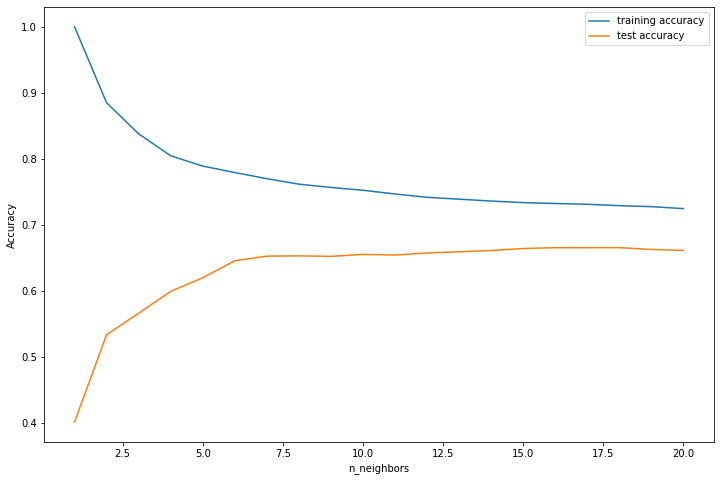

The optimal number of neighbors is 18

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             1.0              0.4706
    Non-Standardized      6             0.7454           0.6139
    Standardized          18             0.7291           0.6655
    
Model :" ['CROSS_SELL_SUCCESS', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'UNIQUE_PER_TOTALS', 'OUT_UNIQUE_MEALS_PURCH', 'OUT_MASTER_CLASSES_ATTENDED', 'CHANGE_AVG_TIME_PER_SITE_VISIT', 'CHANGE_AVG_PREP_VID_TIME', 'CHANGE_TOTAL_PHOTOS_VIEWED', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_UNIQUE_MEALS_PURCH', 'CHANGE_MASTER_CLASSES_ATTENDED', 'POS_CORR', 'junk', 'personal', 'professional']

    Model      Train Sco

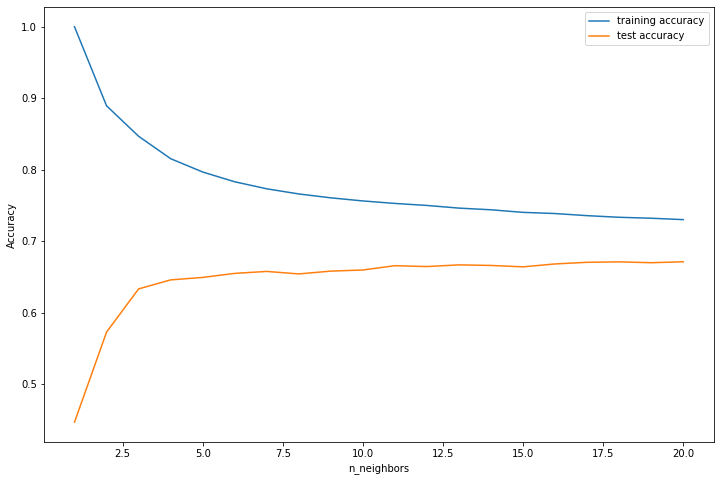

The optimal number of neighbors is 20

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             1.0              0.4545
    Non-Standardized      11             0.7184           0.6633
    Standardized          20             0.7301           0.6711
    
Model :" ['CROSS_SELL_SUCCESS', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'AVG_PREP_VID_TIME', 'LARGEST_ORDER_SIZE', 'MASTER_CLASSES_ATTENDED', 'UNIQUE_PER_TOTALS', 'SUCCESSFUL_ORDERS', 'LATE_PER_TOTAL', 'OUT_UNIQUE_MEALS_PURCH', 'OUT_MASTER_CLASSES_ATTENDED', 'CHANGE_AVG_TIME_PER_SITE_VISIT', 'CHANGE_AVG_PREP_VID_TIME', 'CHANGE_TOTAL_PHOTOS_VIEWED', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_MASTER_CLASSES_ATTENDED', 'POS_CORR', 'junk', 'personal', 'professional', 'MEDIAN_MEAL_RATING_2'

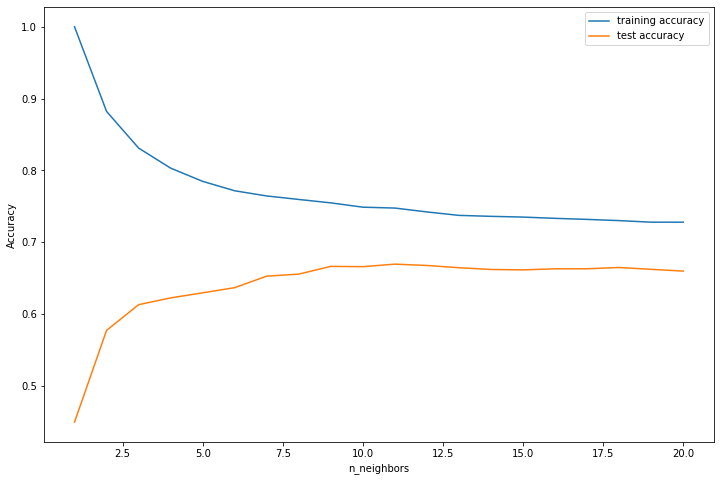

The optimal number of neighbors is 11

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             1.0              0.454
    Non-Standardized      10             0.7166           0.6636
    Standardized          11             0.7476           0.6695
    
Model :" ['MEDIAN_MEAL_RATING', 'AVG_PREP_VID_TIME', 'POS_CORR']

    Model      Train Score      Test Score
    -----      -----------      ----------
    OLS        0.5964           0.5357
    Ridge      0.5964           0.5358
    Lasso      0.4245           0.4045
    ARD        0.4837           0.4268
    


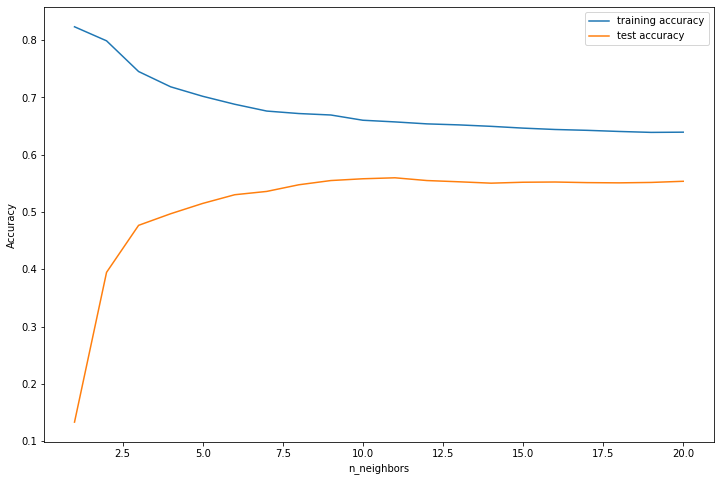

The optimal number of neighbors is 11

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             0.848              0.1782
    Non-Standardized      8             0.6297           0.4977
    Standardized          11             0.6573           0.5597
    
Model :" ['CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_CONTACTS_PER_TOTALS', 'OUT_CONTACTS_PER_TOTALS', 'OUT_TOTAL_LOGINS_PER_TOTAL_MEALS', 'CONTACTS_PER_TOTALS', 'AVG_CLICKS_PER_VISIT', 'UNIQUE_PER_TOTALS', 'TOTAL_LOGINS_PER_TOTAL_MEALS']

    Model      Train Score      Test Score
    -----      -----------      ----------
    OLS        0.5646           0.5542
    Ridge      0.5566           0.55
    Lasso      0.0           -0.0058
    ARD        0.5642           0.5539
    


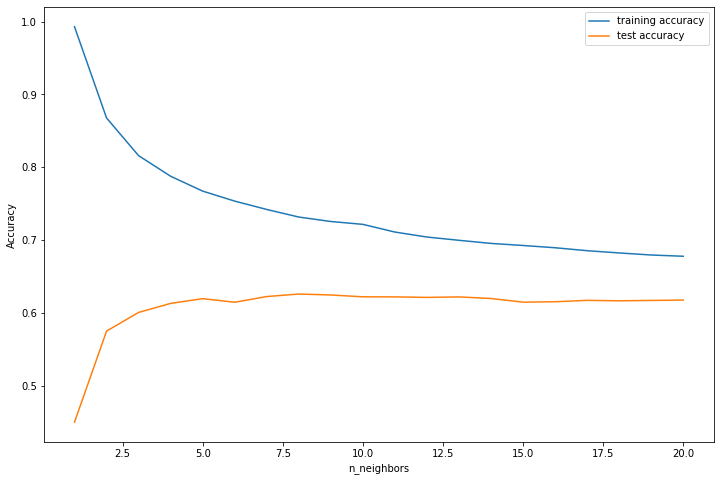

The optimal number of neighbors is 8

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             0.993              0.4569
    Non-Standardized      5             0.7562           0.6228
    Standardized          8             0.7315           0.6257
    
Model :" ['MEDIAN_MEAL_RATING', 'AVG_PREP_VID_TIME', 'POS_CORR', 'CHANGE_CONTACTS_W_CUSTOMER_SERVICE', 'CHANGE_CONTACTS_PER_TOTALS', 'OUT_CONTACTS_PER_TOTALS', 'CONTACTS_PER_TOTALS', 'UNIQUE_PER_TOTALS', 'TOTAL_LOGINS_PER_TOTAL_MEALS']

    Model      Train Score      Test Score
    -----      -----------      ----------
    OLS        0.7084           0.6639
    Ridge      0.7052           0.66
    Lasso      0.4245           0.4045
    ARD        0.6463           0.6111
    


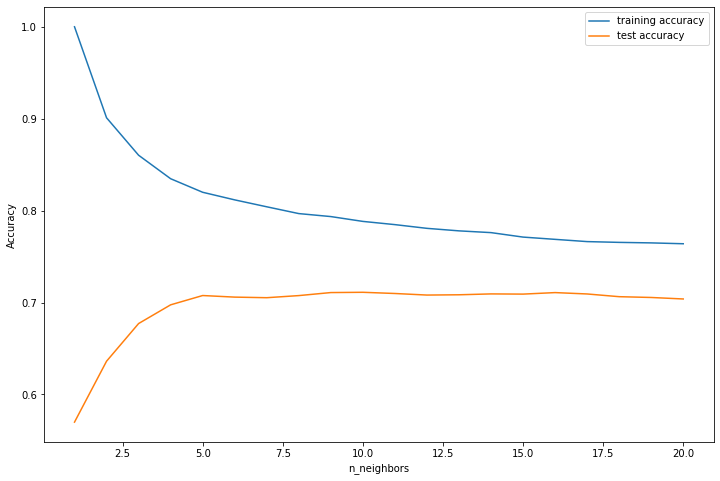

The optimal number of neighbors is 10

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             1.0              0.3608
    Non-Standardized      5             0.7197           0.5651
    Standardized          10             0.7883           0.7111
    
Model :" ['UNIQUE_PER_TOTALS', 'SUCCESSFUL_ORDERS', 'LATE_PER_TOTAL', 'CONTACTS_PER_TOTALS', 'OUT_EARLY_PER_TOTAL', 'OUT_CONTACTS_PER_TOTALS', 'CHANGE_UNIQUE_PER_TOTALS', 'CHANGE_CONTACTS_PER_TOTALS', 'junk', 'personal', 'professional', 'MEDIAN_MEAL_RATING_3', 'MEDIAN_MEAL_RATING_4', 'MEDIAN_MEAL_RATING_5']

    Model      Train Score      Test Score
    -----      -----------      ----------
    OLS        0.6591           0.6258
    Ridge      0.6561           0.6237
    Lasso      0.3716           0.3574
    ARD        0.6259           0.6006
    


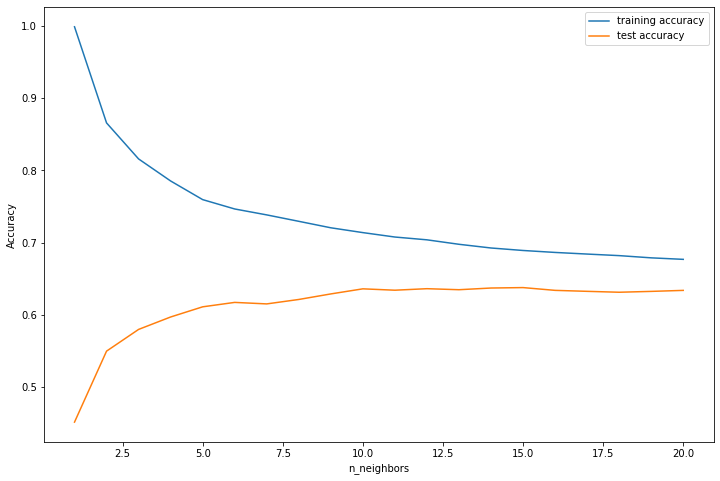

The optimal number of neighbors is 15

    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             0.9989              0.225
    Non-Standardized      16             0.5648           0.5011
    Standardized          15             0.6891           0.6377
    


In [61]:
# Let's try with a for loop to try every model with every parameter

x_variables = [x_variables1, x_variables2, x_variables3, x_variables4, x_variables5, x_variables6, x_variables7]

for i in x_variables:
    
    print(f"""Model :" {i}""")
    
    # applying modelin scikit-learn

    # preparing x-variables
    apprentice_data   = apprentice.loc[: , i]  # Here you just need to change the different 
                                                          # x_variables lists to check which 
                                                          # is the best model, I left 
                                                          # model 1 because it's the winner.


    # preparing response variable
    apprentice_target = apprentice.loc[: , 'LN_REVENUE']


    # running train/test split again
    X_train, X_test, y_train, y_test = train_test_split(
                                                        apprentice_data,
                                                        apprentice_target,
                                                        test_size    =  0.25,
                                                        random_state =  222)
    
    
    
    
    # INSTANTIATING a model object
    lr = sklearn.linear_model.LinearRegression()


    # FITTING to the training data
    lr_fit = lr.fit(X_train, y_train)


    # PREDICTING on new data
    lr_pred = lr_fit.predict(X_test)


    # saving scoring data for future use
    lr_train_score = lr.score(X_train, y_train).round(4)
    lr_test_score  = lr.score(X_test, y_test).round(4)
    
    
    
    
    # INSTANTIATING a model object
    ridge_model = sklearn.linear_model.Ridge()

    # FITTING the training data
    ridge_fit  = ridge_model.fit(X_train, y_train)


    # PREDICTING on new data
    ridge_pred = ridge_fit.predict(X_test)


    # saving scoring data for future use
    ridge_train_score = ridge_model.score(X_train, y_train).round(4)
    ridge_test_score  = ridge_model.score(X_test, y_test).round(4)
    
    
    
    
    # INSTANTIATING a model object
    lasso_model = sklearn.linear_model.Lasso()

    # FITTING the training data
    lasso_fit = lasso_model.fit(X_train, y_train)


    # PREDICTING on new data
    lasso_pred = lasso_fit.predict(X_test)


    # saving scoring data for future use
    lasso_train_score = lasso_model.score(X_train, y_train).round(4)
    lasso_test_score  = lasso_model.score(X_test, y_test).round(4)
    
    
    


    # INSTANTIATING a model object
    ard_model = sklearn.linear_model.ARDRegression()


    # FITTING the training data
    ard_fit = ard_model.fit(X_train, y_train)


    # PREDICTING on new data
    ard_pred = ard_fit.predict(X_test)


    # saving scoring data for future use
    ard_train_score = ard_model.score(X_train, y_train).round(4)
    ard_test_score  = ard_model.score(X_test, y_test).round(4)
    
    
    
    
    
    # comparing results

    print(f"""
    Model      Train Score      Test Score
    -----      -----------      ----------
    OLS        {lr_train_score}           {lr_test_score}
    Ridge      {ridge_train_score}           {ridge_test_score}
    Lasso      {lasso_train_score}           {lasso_test_score}
    ARD        {ard_train_score}           {ard_test_score}
    """)


    # creating a dictionary for model results
    model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'ARD'],

                         'Training' : [lr_train_score, ridge_train_score,
                                       lasso_train_score, ard_train_score],

                         'Testing'  : [lr_test_score, ridge_test_score,
                                       lasso_test_score, ard_test_score]}


    # converting model_performance into a DataFrame
    model_performance = pd.DataFrame(model_performance)


    # sending model results to Excel
    #model_performance.to_excel('regression_model_performance.xlsx',
    #                           index = False)
    
    
    
    # Let's standarize the data

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with housing_data (anything on the x side)
    scaler.fit(apprentice_data)


    # TRANSFORMING our data after fit
    X_scaled = scaler.transform(apprentice_data)


    # converting scaled data into a DataFrame
    X_scaled_df = pd.DataFrame(X_scaled)
    
    
    
    
    
    # INSTANTIATING a KNN model object
    knn_reg = KNeighborsRegressor(algorithm = 'auto',
                                  n_neighbors = 1)


    # FITTING to the training data
    knn_reg.fit(X_train, y_train)


    # PREDICTING on new data
    knn_reg_pred = knn_reg.predict(X_test)


    # saving scoring data for future use
    knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
    knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)
    
    
    
    
    
    
    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []


    # building a visualization of 1 to 50 neighbors
    neighbors_settings = range(1, 21)


    for n_neighbors in neighbors_settings:
        # Building the model
        clf = KNeighborsRegressor(n_neighbors = n_neighbors)
        clf.fit(X_train, y_train)

        # Recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))

        # Recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # plotting the visualization
    #fig, ax = plt.subplots(figsize=(12,8))
    #plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
    #plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
    #plt.ylabel("Accuracy")
    #plt.xlabel("n_neighbors")
    #plt.legend()
    #plt.show()

    # finding the optimal number of neighbors
    opt_neighbors_1 = test_accuracy.index(max(test_accuracy)) + 1
    #print(f"""The optimal number of neighbors is {opt_neighbors_1}""")
    
    
    
    
    # INSTANTIATING a model with the optimal number of neighbors
    knn_opt = KNeighborsRegressor(algorithm = 'auto',
                                  n_neighbors = opt_neighbors_1)



    # FITTING the model based on the training data
    knn_opt.fit(X_train, y_train)



    # PREDITCING on new data
    knn_opt_pred = knn_opt.predict(X_test)


    # saving scoring data for future use
    knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
    knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)
    
    
    
    
    
    #Now we are going to try with the standarized dataset
    X_train, X_test, y_train, y_test = train_test_split(
                                                        X_scaled_df,
                                                        apprentice_target,
                                                        test_size = 0.25,
                                                        random_state = 222)
    
    
    
    
    
    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []


    # building a visualization of 1 to 50 neighbors
    neighbors_settings = range(1, 21)


    for n_neighbors in neighbors_settings:
        # Building the model
        clf = KNeighborsRegressor(n_neighbors = n_neighbors)
        clf.fit(X_train, y_train)

        # Recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))

        # Recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # plotting the visualization
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
    plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("n_neighbors")
    plt.legend()
    plt.show()


    # finding the optimal number of neighbors
    opt_neighbors_2 = test_accuracy.index(max(test_accuracy)) + 1
    print(f"""The optimal number of neighbors is {opt_neighbors_2}""")
    
    
    
    
    # INSTANTIATING a model with the optimal number of neighbors
    knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                    n_neighbors = opt_neighbors_2)



    # FITTING the model based on the training data
    knn_stand.fit(X_train, y_train)



    # PREDITCING on new data
    knn_stand_pred = knn_stand.predict(X_test)


    # saving scoring data for future use
    knn_stand_score_train = knn_stand.score(X_train , y_train).round(4)
    knn_stand_score_test  = knn_stand.score(X_test, y_test).round(4)
    
    
    
    # comparing results

    print(f"""
    KNN Model             Neighbors     Train Score      Test Score
    ----------------      ---------     ----------       ----------
    Non-Standardized      1             {knn_reg_score_train}              {knn_reg_score_test}
    Non-Standardized      {opt_neighbors_1}             {knn_opt_score_train}           {knn_opt_score_test}
    Standardized          {opt_neighbors_2}             {knn_stand_score_train}           {knn_stand_score_test}
    """)


    # creating a dictionary for model results
    model_performance = {'Model'    : ['KNN_NS_1', 'KNN_NS_5', 'KNN_S_6'],

                         'Training' : [knn_reg_score_train, knn_opt_score_train,
                                       knn_stand_score_train],

                         'Testing'  : [knn_reg_score_test, knn_opt_score_test,
                                       knn_stand_score_test]}


<h2> Conclusion </h2>

**The final model is lm_model1 with a Linear Regression. Despite not having the largest score of teh model, it is the one that has a large score and a small difference between train and test score.**

|Model|   |Train Score|   |Test Score|
|-----|   |-----------|   |----------|
|OLS|       |0.7487|        |0.7171|